In [77]:
# Importing Dependencies and Setup
# We don't know what we need, so we'll import a bunch of different modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress

In [78]:
# Load CSV file and turn it into PD DataFrames
goOne_df = pd.read_csv("Resources/goemotions_1.csv")
goTwo_df = pd.read_csv("Resources/goemotions_2.csv")
goThree_df = pd.read_csv("Resources/goemotions_3.csv")

In [79]:
# Merge the three separate DataFrames into one.
dfMerge = goOne_df.merge(goTwo_df, how='outer')
dfMerge = dfMerge.merge(goThree_df, how='outer')

# Convert column into DateTime datatype, and apply the correct unit (seconds) to turn it readable.
dfMerge['created_utc'] = dfMerge['created_utc'].astype('datetime64[s]')
dfMerge

text       id  \
0                                         That game hurt.  eew5j0j   
1        >sexuality shouldn’t be a grouping category I...  eemcysk   
2          You do right, if you don't care then fuck 'em!  ed2mah1   
3                                      Man I love reddit.  eeibobj   
4       [NAME] was nowhere near them, he was by the Fa...  eda6yn6   
...                                                   ...      ...   
211220                             Everyone likes [NAME].  ee6pagw   
211221  Well when you’ve imported about a gazillion of...  ef28nod   
211222                                 That looks amazing  ee8hse1   
211223  The FDA has plenty to criticize. But like here...  edrhoxh   
211224  Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...  edze9g4   

                     author            subreddit    link_id   parent_id  \
0                     Brdd9                  nrl  t3_ajis4z  t1_eew18eq   
1               TheGreen888     unpopularopinion  t3_ai4q37   t3_ai4q37   
2                  Labalool          confessions  t3_abru74  t1_ed2m7g7   
3             MrsRobertshaw             facepalm  t3_ahulml   t3_ahulml   
4       American_Fascist713  starwarsspeculation  t3_ackt2f  t1_eda65q2   
...                     ...                  ...        ...         ...   
211220             Senshado     heroesofthestorm  t3_agjf24   t3_agjf24   
211221           5inchloser          nottheonion  t3_ak26t3   t3_ak26t3   
211222           springt1me       shittyfoodporn  t3_agrnqb   t3_agrnqb   
211223            enamedata             medicine  t3_aejqzd  t1_edrgdtx   
211224           HelperBot_        MorbidReality  t3_afhw30  t1_edze91s   

               created_utc  rater_id example_very_unclear  admiration  ...  \
0      2019-01-25 01:50:39         1                False           0  ...   
1      2019-01-21 15:22:49        37                 True           0  ...   
2      2019-01-02 11:15:44        37                False           0  ...   
3      2019-01-20 06:17:34        18                False           0  ...   
4      2019-01-05 06:10:01         2                False           0  ...   
...                    ...       ...                  ...         ...  ...   
211220 2019-01-16 10:25:22        16                False           0  ...   
211221 2019-01-27 01:39:42        15                False           0  ...   
211222 2019-01-17 00:08:54        70                False           1  ...   
211223 2019-01-11 01:07:12         4                False           0  ...   
211224 2019-01-13 16:34:22        61                 True           0  ...   

        love  nervousness  optimism  pride  realization  relief  remorse  \
0          0            0         0      0            0       0        0   
1          0            0         0      0            0       0        0   
2          0            0         0      0            0       0        0   
3          1            0         0      0            0       0        0   
4          0            0         0      0            0       0        0   
...      ...          ...       ...    ...          ...     ...      ...   
211220     1            0         0      0            0       0        0   
211221     0            0         0      0            0       0        0   
211222     0            0         0      0            0       0        0   
211223     0            0         0      0            0       0        0   
211224     0            0         0      0            0       0        0   

        sadness  surprise  neutral  
0             1         0        0  
1             0         0        0  
2             0         0        1  
3             0         0        0  
4             0         0        1  
...         ...       ...      ...  
211220        0         0        0  
211221        0         0        0  
211222        0         0        0  
211223        0         0        0  
211224        0         0        0  

[211225 rows x 3

In [80]:
# Clean DataFrame by: 1.# Dropping columns, 2.) Choosing "Clear" selections, 3.) Dropping the "example_very_unclear" column after selection
dfStaging = dfMerge.drop(columns=['id', 'author', 'link_id', 'parent_id'])
dfStagingA = dfStaging.loc[(dfStaging['example_very_unclear'] == False)]
dfClean = dfStagingA.drop(columns=['example_very_unclear'])
dfClean
# dfClean will have "clear" examples

text  \
0                                         That game hurt.   
2          You do right, if you don't care then fuck 'em!   
3                                      Man I love reddit.   
4       [NAME] was nowhere near them, he was by the Fa...   
5       Right? Considering it’s such an important docu...   
...                                                   ...   
211219  Well, I'm glad you're out of all that now. How...   
211220                             Everyone likes [NAME].   
211221  Well when you’ve imported about a gazillion of...   
211222                                 That looks amazing   
211223  The FDA has plenty to criticize. But like here...   

                  subreddit         created_utc  rater_id  admiration  \
0                       nrl 2019-01-25 01:50:39         1           0   
2               confessions 2019-01-02 11:15:44        37           0   
3                  facepalm 2019-01-20 06:17:34        18           0   
4       starwarsspeculation 2019-01-05 06:10:01         2           0   
5                TrueReddit 2019-01-23 21:50:08        61           0   
...                     ...                 ...       ...         ...   
211219  raisedbynarcissists 2019-01-04 15:22:34         2           0   
211220     heroesofthestorm 2019-01-16 10:25:22        16           0   
211221          nottheonion 2019-01-27 01:39:42        15           0   
211222       shittyfoodporn 2019-01-17 00:08:54        70           1   
211223             medicine 2019-01-11 01:07:12         4           0   

        amusement  anger  annoyance  approval  caring  ...  love  nervousness  \
0               0      0          0         0       0  ...     0            0   
2               0      0          0         0       0  ...     0            0   
3               0      0          0         0       0  ...     1            0   
4               0      0          0         0       0  ...     0            0   
5               0      0          0         0       0  ...     0            0   
...           ...    ...        ...       ...     ...  ...   ...          ...   
211219          0      0          0         0       0  ...     0            0   
211220          0      0          0         0       0  ...     1            0   
211221          0      0          0         0       1  ...     0            0   
211222          0      0          0         0       0  ...     0            0   
211223          0      1          0         0       0  ...     0            0   

        optimism  pride  realization  relief  remorse  sadness  surprise  \
0              0      0            0       0        0        1         0   
2              0      0            0       0        0        0         0   
3              0      0            0       0        0        0         0   
4              0      0            0       0        0        0         0   
5              0      0            0       0        0        0         0   
...          ...    ...          ...     ...      ...      ...       ...   
211219         0      0            0       0        0        0         0   
211220         0      0            0       0        0        0         0   
211221         0      0            0       0        0        0         0   
211222         0      0            0       0        0        0         0   
211223         0      0            0       0        0        0         0   

        neutral  
0             0  
2             1  
3             0  
4             1  
5             0  
...         ...  
211219        0  
211220        0  
211221        0  
211222        0  
211223        0  

[207814 rows x 32 columns]

In [81]:
# Clean DataFrame by: 1.# Dropping columns, 2.) Choosing "Unclear" selections, 3.) Dropping the "example_very_unclear" column after selection
# Same as above; 
dfStagingB = dfStaging.loc[(dfStaging['example_very_unclear'] == True)]
dfEVUClean = dfStagingB.drop(columns=['example_very_unclear'])
dfEVUClean
# dfEVUClean will have "unclear" examples

text  \
1        >sexuality shouldn’t be a grouping category I...   
62      Oi us cancers don’t want him either! We respec...   
195     I unfortunately can not afford a lawyer. Lucki...   
262     OMG THOSE TINY SHOES! *desire to boop snoot in...   
264     I would pay money for [NAME] to not be my nurs...   
...                                                   ...   
211037    _____ is ruining _____ because kids these days.   
211082  yea I agree, and [NAME] is way younger so has ...   
211113   Huh, assumed he was more of a grindr fella .....   
211214  Well when you’ve imported about a gazillion of...   
211224  Desktop link: ^^/r/HelperBot_ ^^Downvote ^^to ...   

                    subreddit         created_utc  rater_id  admiration  \
1            unpopularopinion 2019-01-21 15:22:49        37           0   
62           Justfuckmyshitup 2019-01-13 22:13:56        22           0   
195                   Divorce 2019-01-01 17:28:15        12           0   
262                   chicago 2019-01-20 05:36:33        61           0   
264               SoulCalibur 2019-01-17 03:50:29        22           0   
...                       ...                 ...       ...         ...   
211037       moviescirclejerk 2019-01-10 23:51:59        57           0   
211082                Dodgers 2019-01-04 22:09:22        37           0   
211113  90dayfianceuncensored 2019-01-30 23:05:53        61           0   
211214            nottheonion 2019-01-27 01:39:42        61           0   
211224          MorbidReality 2019-01-13 16:34:22        61           0   

        amusement  anger  annoyance  approval  caring  ...  love  nervousness  \
1               0      0          0         0       0  ...     0            0   
62              0      0          0         0       0  ...     0            0   
195             0      0          0         0       0  ...     0            0   
262             0      0          0         0       0  ...     0            0   
264             0      0          0         0       0  ...     0            0   
...           ...    ...        ...       ...     ...  ...   ...          ...   
211037          0      0          0         0       0  ...     0            0   
211082          0      0          0         0       0  ...     0            0   
211113          0      0          0         0       0  ...     0            0   
211214          0      0          0         0       0  ...     0            0   
211224          0      0          0         0       0  ...     0            0   

        optimism  pride  realization  relief  remorse  sadness  surprise  \
1              0      0            0       0        0        0         0   
62             0      0            0       0        0        0         0   
195            0      0            0       0        0        0         0   
262            0      0            0       0        0        0         0   
264            0      0            0       0        0        0         0   
...          ...    ...          ...     ...      ...      ...       ...   
211037         0      0            0       0        0        0         0   
211082         0      0            0       0        0        0         0   
211113         0      0            0       0        0        0         0   
211214         0      0            0       0        0        0         0   
211224         0      0            0       0        0        0         0   

        neutral  
1             0  
62            0  
195           0  
262           0  
264           0  
...         ...  
211037        0  
211082        0  
211113        0  
211214        0  
211224        0  

[3411 rows x 32 columns]

In [82]:
dfEVUClean.text.count() / dfStaging.text.count() * 100

1.6148656645756894

In [83]:
dfEmotions = dfClean

In [84]:
# applying Numpy.select to the clean dataframe which will scan selected columns based on conditions and output the sentiments for each emotion selected
emo_conditions = [
    (dfEmotions['amusement'] == 1),
    (dfEmotions['excitement'] == 1),
    (dfEmotions['joy'] == 1),
    (dfEmotions['love'] == 1),
    (dfEmotions['desire'] == 1),
    (dfEmotions['optimism'] == 1),
    (dfEmotions['caring'] == 1),
    (dfEmotions['pride'] == 1),
    (dfEmotions['admiration'] == 1),
    (dfEmotions['gratitude'] == 1),
    (dfEmotions['relief'] == 1),
    (dfEmotions['approval'] == 1),
    (dfEmotions['realization'] == 1),
    (dfEmotions['surprise'] == 1),
    (dfEmotions['curiosity'] == 1),
    (dfEmotions['confusion'] == 1),
    (dfEmotions['fear'] == 1),
    (dfEmotions['nervousness'] == 1),
    (dfEmotions['remorse'] == 1),
    (dfEmotions['embarrassment'] == 1),
    (dfEmotions['disappointment'] == 1),
    (dfEmotions['sadness'] == 1),
    (dfEmotions['grief'] == 1),
    (dfEmotions['disgust'] == 1),
    (dfEmotions['anger'] == 1),
    (dfEmotions['annoyance'] == 1),
    (dfEmotions['disapproval'] == 1),
    (dfEmotions['neutral'] == 1)
]

sentiments = ['Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
              'Positive', 'Positive', 'Positive', 'Positive', 'Positive',
               'Ambiguous', 'Ambiguous','Ambiguous','Ambiguous',
               'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative',
               'Negative', 'Negative', 'Negative', 'Negative', 'Neutral']

dfEmotions['Sentiment'] = np.select(emo_conditions, sentiments)
dfEmotions.head(5)

text            subreddit  \
0                                    That game hurt.                  nrl   
2     You do right, if you don't care then fuck 'em!          confessions   
3                                 Man I love reddit.             facepalm   
4  [NAME] was nowhere near them, he was by the Fa...  starwarsspeculation   
5  Right? Considering it’s such an important docu...           TrueReddit   

          created_utc  rater_id  admiration  amusement  anger  annoyance  \
0 2019-01-25 01:50:39         1           0          0      0          0   
2 2019-01-02 11:15:44        37           0          0      0          0   
3 2019-01-20 06:17:34        18           0          0      0          0   
4 2019-01-05 06:10:01         2           0          0      0          0   
5 2019-01-23 21:50:08        61           0          0      0          0   

   approval  caring  ...  nervousness  optimism  pride  realization  relief  \
0         0       0  ...            0         0      0            0       0   
2         0       0  ...            0         0      0            0       0   
3         0       0  ...            0         0      0            0       0   
4         0       0  ...            0         0      0            0       0   
5         0       0  ...            0         0      0            0       0   

   remorse  sadness  surprise  neutral  Sentiment  
0        0        1         0        0   Negative  
2        0        0         0        1    Neutral  
3        0        0         0        0   Positive  
4        0        0         0        1    Neutral  
5        0        0         0        0   Positive  

[5 rows x 33 columns]

In [85]:
# Adding another column to display the emotion chosen by the rater
emo_map_yin = [
    (dfEmotions['amusement'] == 1),
    (dfEmotions['excitement'] == 1),
    (dfEmotions['joy'] == 1),
    (dfEmotions['love'] == 1),
    (dfEmotions['desire'] == 1),
    (dfEmotions['optimism'] == 1),
    (dfEmotions['caring'] == 1),
    (dfEmotions['pride'] == 1),
    (dfEmotions['admiration'] == 1),
    (dfEmotions['gratitude'] == 1),
    (dfEmotions['relief'] == 1),
    (dfEmotions['approval'] == 1),
    (dfEmotions['realization'] == 1),
    (dfEmotions['surprise'] == 1),
    (dfEmotions['curiosity'] == 1),
    (dfEmotions['confusion'] == 1),
    (dfEmotions['fear'] == 1),
    (dfEmotions['nervousness'] == 1),
    (dfEmotions['remorse'] == 1),
    (dfEmotions['embarrassment'] == 1),
    (dfEmotions['disappointment'] == 1),
    (dfEmotions['sadness'] == 1),
    (dfEmotions['grief'] == 1),
    (dfEmotions['disgust'] == 1),
    (dfEmotions['anger'] == 1),
    (dfEmotions['annoyance'] == 1),
    (dfEmotions['disapproval'] == 1),
    (dfEmotions['neutral'] == 1)
]

emo_map_yang = ['Amusement', 'Excitement', 'Joy', 'Love', 'Desire', 'Optimism', 'Caring',
              'Pride', 'Admiration', 'Gratitude', 'Relief', 'Approval',
               'Realization', 'Surprise','Curiosity','Confusion',
               'Fear', 'Nervousness', 'Remorse', 'Embarrassment', 'Disappointment', 'Sadness', 'Grief',
               'Disgust', 'Anger', 'Annoyance', 'Disapproval', 'Neutral']
dfEmotions['Emotion'] = np.select(emo_map_yin, emo_map_yang)

In [86]:
dfEClean = dfEmotions.copy()
dfEClean.drop(columns = ['amusement', 'excitement', 'joy', 'love', 'desire', 'optimism', 'caring',\
                                                'pride', 'admiration', 'gratitude', 'relief', 'approval',\
                                                'realization', 'surprise','curiosity','confusion',\
                                                'fear', 'nervousness', 'remorse', 'embarrassment', 'disappointment', 'sadness', 'grief',\
                                                'disgust', 'anger', 'annoyance', 'disapproval', 'neutral'], inplace=True)

In [87]:
# Importing "CountsSubredditCat.csv" into a DataFrame, check pathing for errors!
SubredditCatDF = pd.read_csv("Resources/CountsSubredditCat.csv")

# Clean by dropping columns and renaming
SubredditCatClean = SubredditCatDF.drop(columns = ['Subscribers', 'Responses','Notes', '77', 'Discussion', '"General" discussion'])
SubredditCatClean.rename(columns={"Subreddit": "subreddit"}, inplace=True)
SubredditCatClean

# Merge cleaned catDataFrame into main DataFrame
dfCleanStaging = dfEClean.merge(SubredditCatClean)

# Rearranging columns by placing subreddit next to subgroup
dfCleanStagingA = dfCleanStaging[['text', 'subreddit', 'Grouping', 'created_utc', 'rater_id', 'Sentiment', 'Emotion']]

# Renaming titles for readability
dfCleanStagingA.rename(columns = {"text":"Text", "subreddit": "Subreddit", "Grouping":"Group", "created_utc":"UTC", "rater_id":"Rater ID"}, inplace=True)
dfCleanCat = dfCleanStagingA.iloc[:, [0,1,2,3,4,6,5]]

In [88]:
# Clean and categorized DataFrame
dfCleanCat.head()

Text Subreddit   Group  \
0                                    That game hurt.       nrl  sports   
1           My fans on patreon will be rewarded soon       nrl  sports   
2                Lets see how [NAME] goes in Round 6       nrl  sports   
3                                    Apparently lots       nrl  sports   
4  Support the Sydney ~~Blues~~ Sixers. Loved tha...       nrl  sports   

                  UTC  Rater ID     Emotion Sentiment  
0 2019-01-25 01:50:39         1     Sadness  Negative  
1 2019-01-29 07:24:40        33     Neutral   Neutral  
2 2019-01-15 23:34:30        49     Neutral   Neutral  
3 2019-01-30 21:48:09        35     Neutral   Neutral  
4 2019-01-16 23:15:46        18  Excitement  Positive

### ========= Q1 & Q2: Rater Relation to Emotion and Sentiment =========
Notes: 
 We are using individual DataFrames to track the Sentiment & Emotion of day vs. night, group vs. group, and rater vs. rater. <br />
   * This means we need a DataFrame for each rater; 82 different DataFrames.<br />
   * A lot of busywork to be done for Q2, for both making the DFs and plotting them.<br />

---

In [89]:
# Extracting a copy so we can manipulate it without overwriting the original DataFrame
RaterDF = dfCleanCat.copy()
RaterDF

Text Subreddit   Group  \
0                                         That game hurt.       nrl  sports   
1                My fans on patreon will be rewarded soon       nrl  sports   
2                     Lets see how [NAME] goes in Round 6       nrl  sports   
3                                         Apparently lots       nrl  sports   
4       Support the Sydney ~~Blues~~ Sixers. Loved tha...       nrl  sports   
...                                                   ...       ...     ...   
207320  Sadly, yes. You'll only be able to craft weapo...    farcry   games   
207321                                    no its amazing.    farcry   games   
207322               This should be of interest to you. -    farcry   games   
207323  I don't know, they'd have to reduce the accura...    farcry   games   
207324                    Watch it! He has the diabeetus.    farcry   games   

                       UTC  Rater ID     Emotion Sentiment  
0      2019-01-25 01:50:39         1     Sadness  Negative  
1      2019-01-29 07:24:40        33     Neutral   Neutral  
2      2019-01-15 23:34:30        49     Neutral   Neutral  
3      2019-01-30 21:48:09        35     Neutral   Neutral  
4      2019-01-16 23:15:46        18  Excitement  Positive  
...                    ...       ...         ...       ...  
207320 2019-01-23 19:33:09        62     Sadness  Negative  
207321 2019-01-25 13:45:25        23         Joy  Positive  
207322 2019-01-11 10:49:44        51     Neutral   Neutral  
207323 2019-01-24 10:15:12        52     Neutral   Neutral  
207324 2019-01-25 12:17:14        46     Neutral   Neutral  

[207325 rows x 7 columns]

In [90]:
# Sorting it so it goes by Rater Id, then by their Emotion. 
RaterDF.sort_values(['Rater ID','Emotion'], ascending=[True, True], inplace=True)
RaterDF.reset_index(drop=True, inplace=True)
RaterDF.head(8)

Text            Subreddit  \
0                                Lol, get em Corsi!           The_Mueller   
1  it’s a sensitive topic and she probably took i...       TooAfraidToAsk   
2          that is how you start the second half wow        denvernuggets   
3                                 Those subs ... wtf            minnesota   
4  Wait.....What? You do know that's not how it w...    TrollXChromosomes   
5  Don't worry looking for it, there isn't any po...                 INTP   
6  I have a long term plan. I appreciate the conc...  sugarlifestyleforum   
7          All I want for Christmas is a broken home         thatHappened   

          Group                 UTC  Rater ID    Emotion Sentiment  
0      politics 2019-01-22 16:00:57         0  Amusement  Positive  
1    discussion 2019-01-02 04:14:04         0  Amusement  Positive  
2        sports 2019-01-04 04:30:14         0  Amusement  Positive  
3      regional 2019-01-10 16:13:51         0      Anger  Negative  
4      identity 2019-01-17 04:47:51         0  Annoyance  Negative  
5      identity 2019-01-22 01:38:41         0     Caring  Positive  
6  relationship 2019-01-15 15:16:56         0     Caring  Positive  
7       emotive 2019-01-03 14:27:20         0     Desire  Positive

In [91]:
RaterDF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207325 entries, 0 to 207324
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Text       207325 non-null  object        
 1   Subreddit  207325 non-null  object        
 2   Group      205235 non-null  object        
 3   UTC        207325 non-null  datetime64[ns]
 4   Rater ID   207325 non-null  int64         
 5   Emotion    207325 non-null  object        
 6   Sentiment  207325 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 11.1+ MB


In [92]:
Rater4DF = RaterDF.loc[RaterDF['Rater ID'] == 4]
# Gets a DF of Rater 4 through .loc, but there are 82 raters
# print(Rater4DF.Emotion.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
Rater4DF

Text            Subreddit  \
11010  What a career for TBA. Started on the wing for...                  nrl   
11011  That's awesome. You are a great and good perso...          confessions   
11012  You clearly know exactly what your talking abo...          confessions   
11013  Oh. My. [NAME]. This entire post hurts my brai...             facepalm   
11014  Ah I didn’t think of that second definition of...  starwarsspeculation   
...                                                  ...                  ...   
21497          Wow, I don't know how [NAME] handled that        denvernuggets   
21498  53 months?? That is insane, must've been a dif...                drunk   
21499                           The shocking conclusion.    oldpeoplefacebook   
21500  Wow, hearing him swear, thats gonna be something           DevilMayCry   
21501  What?! They must have thought they were at Dis...              nursing   

                  Group                 UTC  Rater ID     Emotion  Sentiment  
11010            sports 2019-01-31 10:18:17         4  Admiration   Positive  
11011        discussion 2019-01-16 23:39:03         4  Admiration   Positive  
11012        discussion 2019-01-08 13:59:54         4  Admiration   Positive  
11013           emotive 2019-01-09 19:39:16         4  Admiration   Positive  
11014  television movie 2019-01-25 22:54:59         4  Admiration   Positive  
...                 ...                 ...       ...         ...        ...  
21497            sports 2019-01-14 01:52:07         4    Surprise  Ambiguous  
21498        discussion 2019-01-15 09:48:15         4    Surprise  Ambiguous  
21499           emotive 2019-01-13 00:48:43         4    Surprise  Ambiguous  
21500             games 2019-01-15 22:44:46         4    Surprise  Ambiguous  
21501          identity 2019-01-30 16:00:20         4    Surprise  Ambiguous  

[10492 rows x 7 columns]

In [93]:
# Found some black magic courtesy of Stackoverflow
# Creates a Dictionary of DataFrames
# Each key is named "Rater(n)", where n is an integer from 0 to 81. (for 82 total)
# e.g.: Rater0 is a key and uses .loc to capture a DataFrame where 'rater_id' corresponds to 0
DataFrameDict = {}
for n in RaterDF['Rater ID'].unique():
    DataFrameDict["Rater" + str(n)] = RaterDF.loc[RaterDF['Rater ID'] == n]

# Getting a List of each key from DataFrameDict and printing each key
keys = []
keys = DataFrameDict.keys()
keys

dict_keys(['Rater0', 'Rater1', 'Rater2', 'Rater3', 'Rater4', 'Rater5', 'Rater6', 'Rater7', 'Rater8', 'Rater9', 'Rater10', 'Rater11', 'Rater12', 'Rater13', 'Rater14', 'Rater15', 'Rater16', 'Rater17', 'Rater18', 'Rater19', 'Rater20', 'Rater21', 'Rater22', 'Rater23', 'Rater24', 'Rater25', 'Rater26', 'Rater27', 'Rater28', 'Rater29', 'Rater30', 'Rater31', 'Rater32', 'Rater33', 'Rater34', 'Rater35', 'Rater36', 'Rater37', 'Rater38', 'Rater39', 'Rater40', 'Rater41', 'Rater42', 'Rater43', 'Rater44', 'Rater45', 'Rater46', 'Rater47', 'Rater48', 'Rater49', 'Rater50', 'Rater51', 'Rater52', 'Rater53', 'Rater54', 'Rater55', 'Rater56', 'Rater57', 'Rater58', 'Rater59', 'Rater60', 'Rater61', 'Rater62', 'Rater63', 'Rater64', 'Rater65', 'Rater66', 'Rater67', 'Rater68', 'Rater69', 'Rater70', 'Rater71', 'Rater72', 'Rater73', 'Rater74', 'Rater75', 'Rater76', 'Rater77', 'Rater78', 'Rater79', 'Rater80', 'Rater81'])

In [94]:
# Testing to see if it works
# We are grabbing the first key listed above and giving it a DataFrame-specific function (.head only works for DFs)
# If it works, then each key is indeed a DF
DataFrameDict.get('Rater0').head(5)

Text          Subreddit  \
0                                Lol, get em Corsi!         The_Mueller   
1  it’s a sensitive topic and she probably took i...     TooAfraidToAsk   
2          that is how you start the second half wow      denvernuggets   
3                                 Those subs ... wtf          minnesota   
4  Wait.....What? You do know that's not how it w...  TrollXChromosomes   

        Group                 UTC  Rater ID    Emotion Sentiment  
0    politics 2019-01-22 16:00:57         0  Amusement  Positive  
1  discussion 2019-01-02 04:14:04         0  Amusement  Positive  
2      sports 2019-01-04 04:30:14         0  Amusement  Positive  
3    regional 2019-01-10 16:13:51         0      Anger  Negative  
4    identity 2019-01-17 04:47:51         0  Annoyance  Negative

In [95]:
# Additional testing to see if we can assign individual keys from DataFrameDict into variables
# If it works, then we can manipulate the DataFrames more easily
testR0 = DataFrameDict.get('Rater0')
testR0.head(5)

Text          Subreddit  \
0                                Lol, get em Corsi!         The_Mueller   
1  it’s a sensitive topic and she probably took i...     TooAfraidToAsk   
2          that is how you start the second half wow      denvernuggets   
3                                 Those subs ... wtf          minnesota   
4  Wait.....What? You do know that's not how it w...  TrollXChromosomes   

        Group                 UTC  Rater ID    Emotion Sentiment  
0    politics 2019-01-22 16:00:57         0  Amusement  Positive  
1  discussion 2019-01-02 04:14:04         0  Amusement  Positive  
2      sports 2019-01-04 04:30:14         0  Amusement  Positive  
3    regional 2019-01-10 16:13:51         0      Anger  Negative  
4    identity 2019-01-17 04:47:51         0  Annoyance  Negative

In [96]:
# Using a for loop to assign each key to a variable 
# I don't want the variables to share the same name as the keys, so we will change the name to 'key' + 'df'
# Using 'locals()' function so we can modify the name to 'Rater(n)DF' instead of 'Rater(n)'
for key in keys:
   locals()[key + 'DF'] = DataFrameDict.get(key)           

# Testing out a random number from 0 to 81
Rater55DF.head(5)

Text  \
146704                          You got the kindest heart   
146705                      Yo u r awesome op. Gold me :D   
146706  It's vodka/tonic time for me buddy! I'm off wo...   
146707                        Good dad, manipulative son.   
146708                             That motto is awesome!   

                  Subreddit             Group                 UTC  Rater ID  \
146704          confessions        discussion 2019-01-16 06:03:16        55   
146705          confessions        discussion 2019-01-16 01:46:40        55   
146706          confessions        discussion 2019-01-10 23:49:42        55   
146707             facepalm           emotive 2019-01-17 00:59:00        55   
146708  starwarsspeculation  television movie 2019-01-29 23:00:14        55   

           Emotion Sentiment  
146704  Admiration  Positive  
146705  Admiration  Positive  
146706  Admiration  Positive  
146707  Admiration  Positive  
146708  Admiration  Positive

In [97]:
# Checking out rater 68, who should only have 1 rating
Rater68DF
# They are annoyed.

Text Subreddit     Group  \
184113  [NAME] has weird ideas about everything.  medicine  identity   

                       UTC  Rater ID    Emotion Sentiment  
184113 2019-01-30 11:37:20        68  Annoyance  Negative

In [98]:
# Sampling some random raters
# Rater 5 and 9 have much higher positives ratings than the rest.
# Rater 6 gave much higher neutrals ratings than the rest.
# Rater 11 gave much higher negatives ratings than the rest.

# print('- Rater 4 -')
# print(Rater4DF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# print('- Rater 5 -')
# print(Rater5DF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# print('- Rater 6 -')
# print(Rater6DF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# print('- Rater 7 -')
# print(Rater7DF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# print('- Rater 8 -')
# print(Rater8DF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# print('- Rater 9 -')
# print(Rater9DF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# print('- Rater 10 -')
# print(Rater10DF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# print('- Rater 11 -')
# print(Rater11DF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# print('- Rater 12 -')
# print(Rater12DF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')


### ============ Q1 & Q2 END ============

### Q3: Date & Time Relation to Emotion and Sentiment 
Notes: <br />
Difference in data isn't as drastic, we can redefine hours of day and hours of night. <br />
More activity during night hours. <br />
We can try to see see activity in specific subreddit groupings depending on day / night. <br />

---

In [99]:
# Extracting a copy so we can manipulate it without overwriting the original DataFrame
DTdf = dfCleanCat.copy()
DTdf

Text Subreddit   Group  \
0                                         That game hurt.       nrl  sports   
1                My fans on patreon will be rewarded soon       nrl  sports   
2                     Lets see how [NAME] goes in Round 6       nrl  sports   
3                                         Apparently lots       nrl  sports   
4       Support the Sydney ~~Blues~~ Sixers. Loved tha...       nrl  sports   
...                                                   ...       ...     ...   
207320  Sadly, yes. You'll only be able to craft weapo...    farcry   games   
207321                                    no its amazing.    farcry   games   
207322               This should be of interest to you. -    farcry   games   
207323  I don't know, they'd have to reduce the accura...    farcry   games   
207324                    Watch it! He has the diabeetus.    farcry   games   

                       UTC  Rater ID     Emotion Sentiment  
0      2019-01-25 01:50:39         1     Sadness  Negative  
1      2019-01-29 07:24:40        33     Neutral   Neutral  
2      2019-01-15 23:34:30        49     Neutral   Neutral  
3      2019-01-30 21:48:09        35     Neutral   Neutral  
4      2019-01-16 23:15:46        18  Excitement  Positive  
...                    ...       ...         ...       ...  
207320 2019-01-23 19:33:09        62     Sadness  Negative  
207321 2019-01-25 13:45:25        23         Joy  Positive  
207322 2019-01-11 10:49:44        51     Neutral   Neutral  
207323 2019-01-24 10:15:12        52     Neutral   Neutral  
207324 2019-01-25 12:17:14        46     Neutral   Neutral  

[207325 rows x 7 columns]

In [100]:
# Making a copy called DT_df
# I wasn't sure if it was going to work and make a safety measure
DT_df = DTdf.copy()

# Setting 'created_utc' as the index of DT_df
# This lets us use the .between_time function below.  
DT_df.index=DT_df.UTC

In [101]:
# Using .between_time function, which functions as .loc but for DataTime. 
DTDay_df = DT_df.between_time('1:00', '13:00')
DTDayN_df = DTDay_df.loc[DTDay_df['Emotion'] != 'Neutral', :]

DTNight_df = DT_df.between_time('13:00', '1:00')
DTNightN_df = DTNight_df.loc[DTNight_df['Emotion'] != 'Neutral', :]

# DTNight_df for full DataFrame during 6pm - 6am EST. This DF has 127849 rows.
# DTNightN_df for DataFrame without "Neutral" emotion during 6pm - 6am EST. This DF has 93892 rows.
# DTDay_df for full DataFrame during 6am - 6pm EST. This DF has 79968 rows.
# DTDayN_df for DataFrame without "Neutral" emotion during 6am - 6pm EST. This DF has 58627 rows.

In [102]:
# Grabbing sentiments for daytime, EST.
print(DTDayN_df.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
DTDayN_df.info()

Positive     54.6%
Negative     30.3%
Ambiguous    15.1%
Name: Sentiment, dtype: object
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 62036 entries, 2019-01-25 01:50:39 to 2019-01-20 08:25:50
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       62036 non-null  object        
 1   Subreddit  62036 non-null  object        
 2   Group      61420 non-null  object        
 3   UTC        62036 non-null  datetime64[ns]
 4   Rater ID   62036 non-null  int64         
 5   Emotion    62036 non-null  object        
 6   Sentiment  62036 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 3.8+ MB


In [103]:
# Grabbing sentiments for nighttime, EST.
print(DTNightN_df.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
DTNightN_df.info()

Positive     54.2%
Negative     30.1%
Ambiguous    15.7%
Name: Sentiment, dtype: object
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90093 entries, 2019-01-16 23:15:46 to 2019-01-25 13:45:25
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Text       90093 non-null  object        
 1   Subreddit  90093 non-null  object        
 2   Group      89180 non-null  object        
 3   UTC        90093 non-null  datetime64[ns]
 4   Rater ID   90093 non-null  int64         
 5   Emotion    90093 non-null  object        
 6   Sentiment  90093 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 5.5+ MB


In [104]:
# DataFrames that grab comments from the first and last week of Jan
janFD = DT_df.loc['2019-01-01']
janFW = DT_df.loc['2019-01-01':'2019-01-07']
janW2 = DT_df.loc['2019-01-08':'2019-01-14']
janW3 = DT_df.loc['2019-01-15':'2019-01-21']
janLW = DT_df.loc['2019-01-25':'2019-01-31']
janPay = DT_df.loc['2019-01-30':'2019-01-31']

In [105]:
# Finding the average sentiment
print(DT_df.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

Positive     39.9%
Neutral      26.6%
Negative     22.1%
Ambiguous    11.4%
Name: Sentiment, dtype: object


In [106]:
# print(janFD.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# print('First Week, 1st to 2nd')
# print(janFW.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# print('Second Week, 8th - 14th')
# print(janW2.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# print('Third Week, 15th - 21st')
# print(janW3.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# print('Last Week, 25th - 31st')
# print(janLW.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# print('Paydays, 30th - 31st')
# print(janPay.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

# Bonus: Finding Rater Sentiments, Assigned Groupings, Statistical Summaries

## Finding Rater Sentiment over Comments Rated

Do ratings become increasingly positive / negative over time?

In [107]:
RaterCountDF = RaterDF.copy()
RaterCountDF.set_index(['Rater ID'], inplace=True)
RaterCountDF.sort_index(inplace=True)
RaterCountDF.head(3)

Text       Subreddit  \
Rater ID                                                                      
0                                       Lol, get em Corsi!      The_Mueller   
0         it’s a sensitive topic and she probably took i...  TooAfraidToAsk   
0                 that is how you start the second half wow   denvernuggets   

               Group                 UTC    Emotion Sentiment  
Rater ID                                                       
0           politics 2019-01-22 16:00:57  Amusement  Positive  
0         discussion 2019-01-02 04:14:04  Amusement  Positive  
0             sports 2019-01-04 04:30:14  Amusement  Positive

In [108]:
RPCS = RaterCountDF.index.value_counts()
print(RPCS)

4     10492
61     8733
37     8082
2      5737
52     5379
      ...  
53       80
45       72
0        50
47        7
68        1
Name: Rater ID, Length: 82, dtype: int64


In [109]:
RaterPosCount = []
RaterPosCount = RaterCountDF.index[RaterCountDF['Sentiment'] == 'Positive']
RaterNegCount = RaterCountDF.index[RaterCountDF['Sentiment'] == 'Negative']
RaterAmbCount = RaterCountDF.index[RaterCountDF['Sentiment'] == 'Ambiguous']
RaterNeuCount = RaterCountDF.index[RaterCountDF['Sentiment'] == 'Neutral']
RaterPosCount.value_counts()

61    4463
4     4255
37    4045
15    2769
70    2307
      ... 
64      36
45      31
69      30
0       22
47       2
Name: Rater ID, Length: 81, dtype: int64

In [110]:
RaterScatter_DF = pd.DataFrame(RaterPosCount.value_counts())
RaterScatter_DF.rename(columns={"Rater ID": "Pos. Ratings"}, inplace=True)
RaterScatter_DF.insert(0, "Cmt. Ratings", RaterDF['Rater ID'].value_counts())
RaterScatter_DF.insert(2, "Neg. Ratings", RaterNegCount.value_counts())
RaterScatter_DF.insert(3, "Amb. Ratings", RaterAmbCount.value_counts())
RaterScatter_DF.insert(4, "Neu. Ratings", RaterNeuCount.value_counts())
RaterScatter_DF.index.name = 'Rater ID'
RaterScatter_DF.head(5)

Cmt. Ratings  Pos. Ratings  Neg. Ratings  Amb. Ratings  Neu. Ratings
Rater ID                                                                      
61                8733          4463          1373        1411.0          1486
4                10492          4255          2252        1334.0          2651
37                8082          4045          1306        1472.0          1259
15                5038          2769           870        1199.0           200
70                5379          2307          1364         609.0          1099

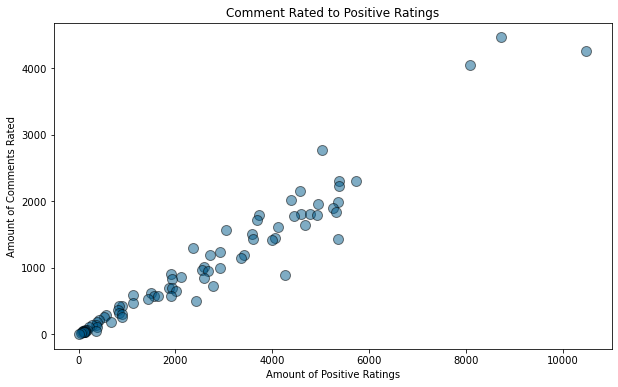

In [111]:
plt.figure(figsize=(10, 6))
plt.scatter(RaterScatter_DF['Cmt. Ratings'], RaterScatter_DF['Pos. Ratings'], marker="o", facecolors="#005a8a", edgecolors="black", alpha=0.5, s = 100)
# Labeling the graph
plt.title("Comment Rated to Positive Ratings")
plt.xlabel("Amount of Positive Ratings")
plt.ylabel("Amount of Comments Rated")
plt.show()

Text(0, 0.5, 'Amount of Comments Rated')

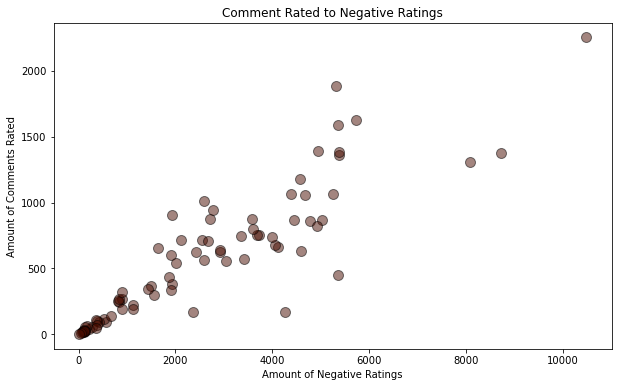

In [112]:
plt.figure(figsize=(10, 6))
plt.scatter(RaterScatter_DF['Cmt. Ratings'], RaterScatter_DF['Neg. Ratings'], marker="o", facecolors="#490d00", edgecolors="black", alpha=0.5, s = 100)
# Labeling the graph
plt.title("Comment Rated to Negative Ratings")
plt.xlabel("Amount of Negative Ratings")
plt.ylabel("Amount of Comments Rated")

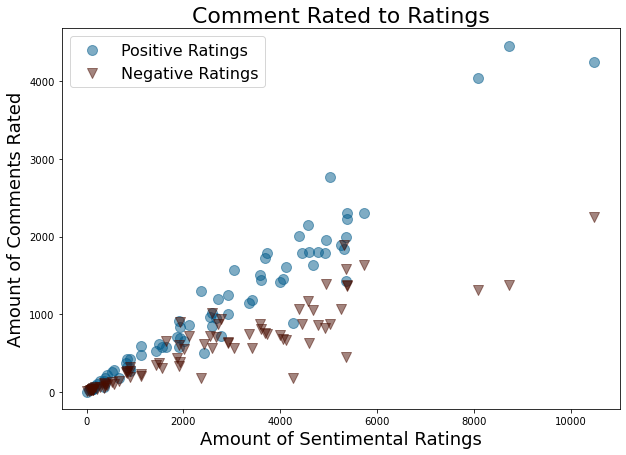

In [113]:
plt.figure(figsize=(10, 7))
plt.scatter(
    RaterScatter_DF['Cmt. Ratings'],
    RaterScatter_DF['Pos. Ratings'],
    alpha=0.5,
    s=100,
    facecolors="#005a8a",
    marker="o"
)
plt.scatter(
    RaterScatter_DF['Cmt. Ratings'],
    RaterScatter_DF['Neg. Ratings'],
    alpha=0.5,
    s=100,
    facecolors="#490d00",
    marker="v",
)
plt.title("Comment Rated to Ratings", fontsize=22)
plt.legend(["Positive Ratings", "Negative Ratings"], prop={'size': 16})
plt.xlabel("Amount of Sentimental Ratings", fontsize=18)
plt.ylabel("Amount of Comments Rated", fontsize=18)
plt.savefig('Resources/RaterScatterplot.png')
plt.show()

## Subreddit Groupings for Top 3 Raters

How were the comments assigned to raters? Was it random or roughly similar?

In [114]:
Top3Count = (Rater37DF.Text.count() + Rater4DF.Text.count() + Rater61DF.Text.count())
Top3Count / RaterDF.Text.count()

0.13171108163511394

In [115]:
Top3Count

27307

In [116]:
# Creating a DF for Top 3 Raters
R4G = Rater4DF.Group.value_counts()
R61G = Rater61DF.Group.value_counts()
R37G = Rater37DF.Group.value_counts()

RaterLines = pd.DataFrame(R4G)
RaterLines.rename(columns={"Group": "Rater 4"}, inplace=True)
RaterLines.insert(1, "Rater 37", R37G)
RaterLines.insert(2, "Rater 61", R61G)
RaterLines.index.name = 'Groups'
RaterLines

Rater 4  Rater 37  Rater 61
Groups                                       
discussion           1811      1402      1458
emotive              1675      1266      1386
identity             1439      1191      1308
sports               1398      1008      1100
politics             1030       779       836
regional              740       551       604
television movie      727       634       684
games                 713       457       533
relationship          460       417       414
digital media         288       216       232
finance                70        47        60
drugs                  18        18        19

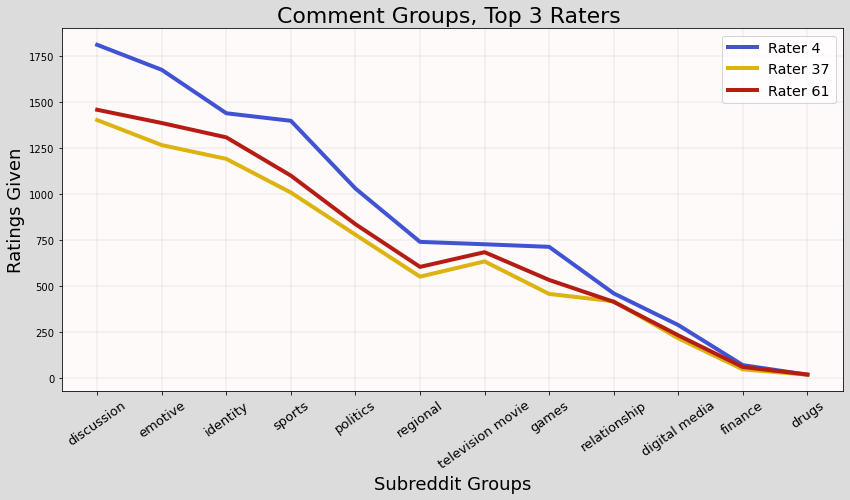

In [117]:
# Grabbing Emotion for the first major group (Discussion, Sports, Emotive, Identity)
# Will attempt to make this into a line chart 
R4Line = RaterLines['Rater 4']
R37Line = RaterLines['Rater 37']
R61Line = RaterLines['Rater 61']

# Plotting
x_axis = np.arange(len(R4Line)) 
tick_locations = [value for value in x_axis]
figRLines, axRLines = plt.subplots(figsize=(14,8), facecolor='gainsboro')
axRLines.set_facecolor('snow')
axRLines.plot(x_axis, R4Line, label='Rater 4', c='#4053d3', lw=4, ls='solid')
axRLines.plot(x_axis, R37Line, label='Rater 37', c='#ddb310', lw=4)
axRLines.plot(x_axis, R61Line, label='Rater 61', c='#b51d14', lw=4)
axRLines.grid(b=True, which='major', color='black', linewidth=0.075)

# plt.ylim(0, 3000)
plt.title('Comment Groups, Top 3 Raters ', fontsize=22)
plt.xlabel('Subreddit Groups', fontsize=18)
plt.ylabel('Ratings Given', fontsize=18)
plt.xticks(tick_locations, RaterLines.index, rotation=35,fontsize=13)
legendRLines = axRLines.legend(loc='best', fontsize='x-large')
plt.subplots_adjust(bottom=0.25)
plt.savefig('Resources/RaterSubgroup.png')
plt.show()

In [118]:
# Creating a DF for Raters near Mode
R72G = Rater72DF.Group.value_counts()
R12G = Rater12DF.Group.value_counts()
R66G = Rater66DF.Group.value_counts()
R76G = Rater76DF.Group.value_counts()

RaterLinesMode = pd.DataFrame(R72G)
RaterLinesMode.rename(columns={"Group": "Rater 72"}, inplace=True)
RaterLinesMode.insert(1, "Rater 12", R12G)
RaterLinesMode.insert(2, "Rater 66", R66G)
RaterLinesMode.insert(3, "Rater 76", R76G)
RaterLinesMode.index.name = 'Groups'
RaterLinesMode

Rater 72  Rater 12  Rater 66  Rater 76
Groups                                                  
discussion             438       420       409       408
identity               429       371       313       348
emotive                421       399       387       354
sports                 307       351       393       343
television movie       254       186       210       194
politics               226       243       198       223
regional               172       191       232       220
games                  158       207       240       222
relationship           149        93        75        95
digital media           68        80        75        82
finance                 21        17        19        29
drugs                   13         6         8         8

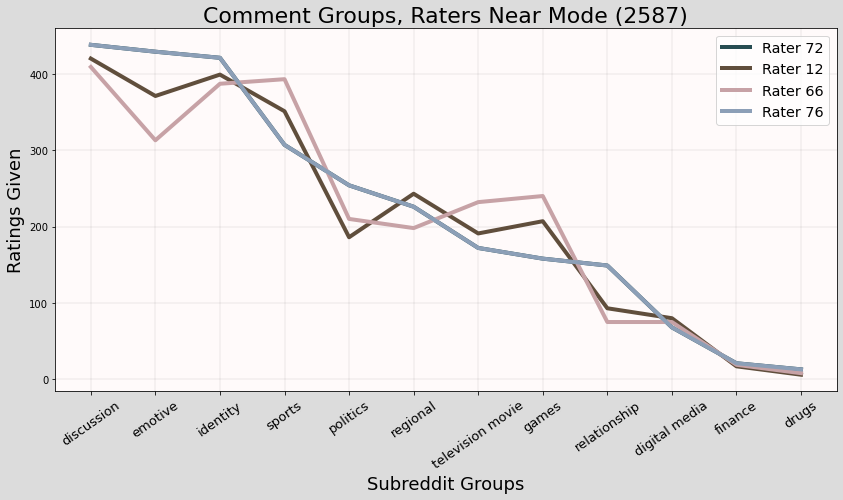

In [119]:
# Grabbing Emotion for the first major group (Discussion, Sports, Emotive, Identity)
# Will attempt to make this into a line chart 
R72Line = RaterLinesMode['Rater 72']
R12Line = RaterLinesMode['Rater 12']
R66Line = RaterLinesMode['Rater 66']
R76Line = RaterLinesMode['Rater 72']

# Plotting
x_axis = np.arange(len(R72Line)) 
tick_locations = [value for value in x_axis]
figRLinesMode, axRLinesMode = plt.subplots(figsize=(14,8), facecolor='gainsboro')
axRLinesMode.set_facecolor('snow')
axRLinesMode.plot(x_axis, R72Line, label='Rater 72', c='#274d52', lw=4)
axRLinesMode.plot(x_axis, R12Line, label='Rater 12', c='#604e3c', lw=4)
axRLinesMode.plot(x_axis, R66Line, label='Rater 66', c='#c7a2a6', lw=4)
axRLinesMode.plot(x_axis, R76Line, label='Rater 76', c='#8c9fb7', lw=4)
axRLinesMode.grid(b=True, which='major', color='black', linewidth=0.075)

plt.title('Comment Groups, Raters Near Mode (2587)', fontsize=22)
plt.xlabel('Subreddit Groups', fontsize=18)
plt.ylabel('Ratings Given', fontsize=18)
plt.xticks(tick_locations, RaterLines.index, rotation=35,fontsize=13)
legendRLinesMode = axRLinesMode.legend(loc='best', fontsize='x-large')
plt.subplots_adjust(bottom=0.25)
plt.savefig('Resources/RaterModeSubgroup.png')
plt.show()

In [120]:
# Creating a DF for Raters between 100 and 200 Ratings
R44G = Rater44DF.Group.value_counts()
R69G = Rater69DF.Group.value_counts()
R71G = Rater71DF.Group.value_counts()
R17G = Rater17DF.Group.value_counts()
R64G = Rater64DF.Group.value_counts()
R65G = Rater65DF.Group.value_counts()
R13G = Rater13DF.Group.value_counts()

RaterLinesHun = pd.DataFrame(R44G)
RaterLinesHun.rename(columns={"Group": "Rater 44"}, inplace=True)
RaterLinesHun.insert(1, "Rater 69", R69G)
RaterLinesHun.insert(2, "Rater 71", R71G)
RaterLinesHun.insert(3, "Rater 17", R17G)
RaterLinesHun.insert(4, "Rater 64", R64G)
RaterLinesHun.insert(5, "Rater 65", R65G)
RaterLinesHun.insert(6, "Rater 13", R13G)
RaterLinesHun.dropna(inplace=True)

RaterLinesHun.index.name = 'Groups'
RaterLinesHun

Rater 44  Rater 69  Rater 71  Rater 17  Rater 64  Rater 65  \
Groups                                                                         
emotive                 21        12      18.0        19        22      25.0   
discussion              19        15      19.0        21        24      19.0   
sports                  16        15      19.0        15        15      14.0   
identity                15        21      11.0        19        14      20.0   
regional                10         5      12.0        11         5      14.0   
politics                 5         9       9.0        19        11       7.0   
relationship             5         6       1.0         4        11       5.0   
television movie         5        14       9.0         3        15      11.0   
digital media            2         7       2.0         4         2       9.0   
games                    1         2      17.0         7        11      13.0   

                  Rater 13  
Groups                      
emotive               24.0  
discussion            36.0  
sports                22.0  
identity              24.0  
regional              11.0  
politics              23.0  
relationship          12.0  
television movie      10.0  
digital media          4.0  
games                  7.0

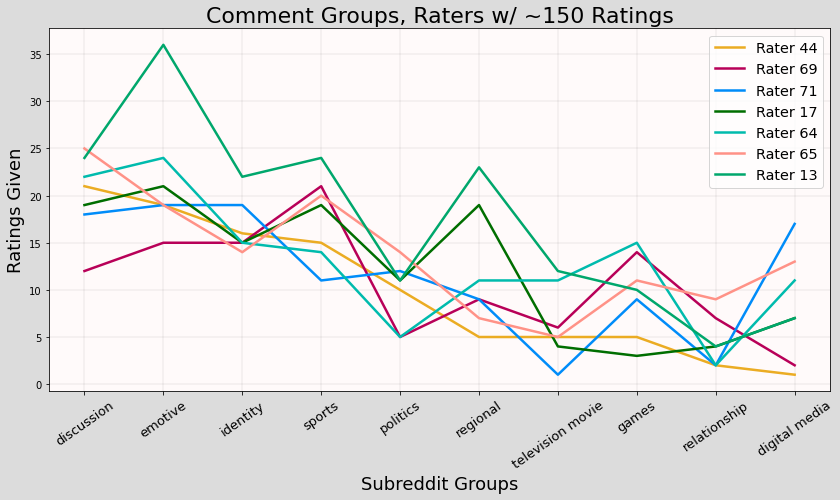

In [121]:
# Grabbing Emotion for the first major group (Discussion, Sports, Emotive, Identity)
# Will attempt to make this into a line chart 
R44Line = RaterLinesHun['Rater 44']
R69Line = RaterLinesHun['Rater 69']
R71Line = RaterLinesHun['Rater 71']
R17Line = RaterLinesHun['Rater 17']
R64Line = RaterLinesHun['Rater 64']
R65Line = RaterLinesHun['Rater 65']
R13Line = RaterLinesHun['Rater 13']

# Plotting
x_axis = np.arange(len(R13Line)) 
tick_locations = [value for value in x_axis]
figRLinesHun, axRLinesHun = plt.subplots(figsize=(14,8), facecolor='gainsboro')
axRLinesHun.set_facecolor('snow')
axRLinesHun.plot(x_axis, R44Line, label='Rater 44', c='#ebac23', lw=2.5)
axRLinesHun.plot(x_axis, R69Line, label='Rater 69', c='#b80058', lw=2.5)
axRLinesHun.plot(x_axis, R71Line, label='Rater 71', c='#008cf9', lw=2.5)
axRLinesHun.plot(x_axis, R17Line, label='Rater 17', c='#006e00', lw=2.5)
axRLinesHun.plot(x_axis, R64Line, label='Rater 64', c='#00bbad', lw=2.5)
axRLinesHun.plot(x_axis, R65Line, label='Rater 65', c='#ff9287', lw=2.5)
axRLinesHun.plot(x_axis, R13Line, label='Rater 13', c='#00a76c', lw=2.5)
axRLinesHun.grid(b=True, which='major', color='black', linewidth=0.075)

plt.title('Comment Groups, Raters w/ ~150 Ratings', fontsize=22)
plt.xlabel('Subreddit Groups', fontsize=18)
plt.ylabel('Ratings Given', fontsize=18)
plt.xticks(tick_locations, RaterLines.index, rotation=35,fontsize=13)
legendRLinesHun = axRLinesHun.legend(loc='best', fontsize='x-large')
plt.subplots_adjust(bottom=0.25)
plt.savefig('Resources/RaterHunSubgroup.png')
plt.show()

## Statistical Summary

What is the statistical summary of the raters?

In [122]:
RaterDF
RaterVC = RaterDF['Rater ID'].value_counts()

In [123]:
# Calculating measures of central tendency
RaterMean = int(np.mean(RaterVC))
print(f"The mean is {RaterMean} comments rated.")
RaterMedian = int(np.median(RaterVC))
print(f"The median is {RaterMedian} comments rated.")
RaterMode = st.mode(RaterVC)
print(f"The mode is {RaterMode} comments rated.")

RaterMax = RaterVC.max()
RaterMin = RaterVC.min()
print(f"The max is {RaterMax} comments rated by rater 4, minimum is {RaterMin} comments rated by rater 68.")

The mean is 2528 comments rated.
The median is 2061 comments rated.
The mode is ModeResult(mode=array([2587], dtype=int64), count=array([2])) comments rated.
The max is 10492 comments rated by rater 4, minimum is 1 comments rated by rater 68.


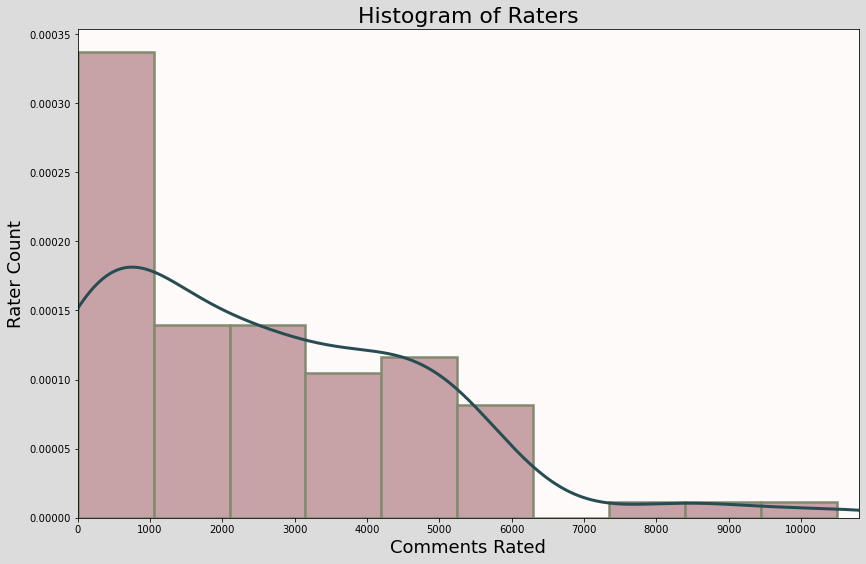

NormaltestResult(statistic=15.305263795961459, pvalue=0.0004747928767468)


In [124]:
# Characterize the data set using matplotlib and stats.normaltest
x_axis = np.arange(0, 11000, 1000) 
tick_locations = [value for value in x_axis]

# Making the graph, making it pretty, saving it
figRStats, axRStats = plt.subplots(figsize=(14,9), facecolor='gainsboro')
axRStats.set_facecolor('snow')
axRStats.hist(RaterVC, density=True, color='#c7a2a6', ec='#818b70', lw=2.5)
RaterVC.plot(kind='density', color='#274d52', lw=3)
plt.xticks(tick_locations)
plt.title('Histogram of Raters', fontsize=22)
plt.xlabel('Comments Rated', fontsize=18)
plt.ylabel('Rater Count', fontsize=18)
plt.xlim(0, 10800)
plt.savefig('Resources/RaterHistogram.png')
plt.show()

print(st.normaltest(RaterVC))

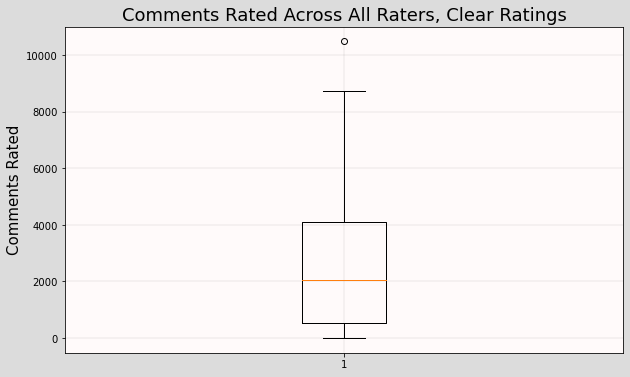

In [125]:
figRBox, axRBox = plt.subplots(figsize=(10,6), facecolor='gainsboro')
axRBox.set_facecolor('snow')
axRBox.set_title('Comments Rated Across All Raters, Clear Ratings', fontsize=18)
axRBox.set_ylabel('Comments Rated', fontsize=15)
axRBox.grid(b=True, which='major', color='black', linewidth=0.075)
axRBox.boxplot(RaterVC)
plt.savefig('Resources/RaterClearBoxplot.png')
plt.show()

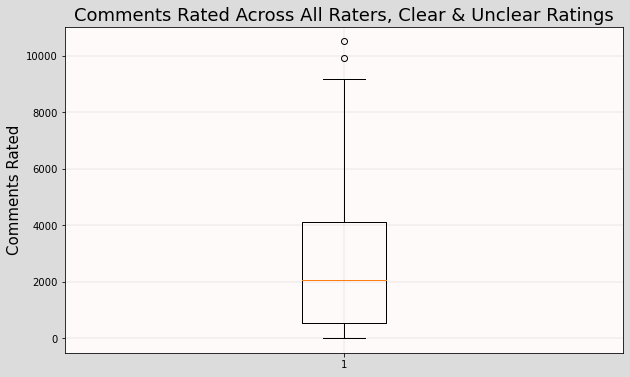

In [126]:
RaterAllVC = dfMerge.rater_id.value_counts()
figRBoxA, axRBoxA = plt.subplots(figsize=(10,6), facecolor='gainsboro')
axRBoxA.set_facecolor('snow')
axRBoxA.set_title('Comments Rated Across All Raters, Clear & Unclear Ratings', fontsize=18)
axRBoxA.set_ylabel('Comments Rated', fontsize=15)
axRBoxA.grid(b=True, which='major', color='black', linewidth=0.075)
axRBoxA.boxplot(RaterAllVC)
plt.savefig('Resources/RaterCompBoxplot.png')
plt.show()

### ================== Q3 END ==================

### Q4: Merging Subreddit Grouping to DataFrame

Amount | Subgroup          | Content Description        |
----------- | -----------       | -----------           |
77          | Discussion        | General discussion    |
64          | Sports            | Relating to sports    |
63          | Emotive           | Aimed to evoke specific emotion   |
63          | Identity          | Relating to a specific identity   |
49          | Games             | Relating to a games   |
46          | Regional          | Relating to a specific region     |
41          | Politics          | Relating to political subject     |
36          | Television Movie  | Relating to TV or movie           |
17          | Relationship      | Relating to rom./ pla. relationship |
15          | Digital Media | General digital media content         |

*In other words 63 subreddits are tagged with identity and their contents is primarily dependent with a specific identity; e.g., age, sexuality, occupation or otherwise.*

---






In [127]:
# Importing "CountsSubredditCat.csv" into a DataFrame, check pathing for errors!
SubredditCatDF = pd.read_csv("Resources/CountsSubredditCat.csv")

# Clean by dropping columns and renaming
SubredditCatClean = SubredditCatDF.drop(columns = ['Subscribers', 'Responses','Notes', '77', 'Discussion', '"General" discussion'])
SubredditCatClean.rename(columns={"Subreddit": "subreddit"}, inplace=True)
SubredditCatClean

subreddit          Grouping
0              cringe           emotive
1     loveafterlockup  television movie
2       socialanxiety        discussion
3    AnimalsBeingBros           emotive
4             OkCupid      relationship
..                ...               ...
478             hawks            sports
479   Anticonsumption        discussion
480              SSBM             games
481         shieldbro  television movie
482            farcry             games

[483 rows x 2 columns]

In [128]:
# Merge cleaned catDataFrame into main DataFrame
dfCleanStaging = dfEmotions.merge(SubredditCatClean)

# Dropping Emotion matrix as we have their emotion listed under "Emotion" column.
dfCleanStagingA = dfCleanStaging.drop(columns = ['amusement', 'excitement', 'joy', 'love', 'desire', 'optimism', 'caring',\
                                                'pride', 'admiration', 'gratitude', 'relief', 'approval',\
                                                'realization', 'surprise','curiosity','confusion',\
                                                'fear', 'nervousness', 'remorse', 'embarrassment', 'disappointment', 'sadness', 'grief',\
                                                'disgust', 'anger', 'annoyance', 'disapproval', 'neutral'])

# Rearranging columns by placing subreddit next to subgroup
dfCleanStagingB = dfCleanStagingA[['text', 'subreddit', 'Grouping', 'created_utc', 'rater_id', 'Sentiment', 'Emotion']]

# Renaming titles for readability
dfCleanStagingB.rename(columns = {"text":"Text", "subreddit": "Subreddit", "Grouping":"Group", "created_utc":"UTC", "rater_id":"Rater ID"}, inplace=True)
dfCleanStagingB

Text Subreddit   Group  \
0                                         That game hurt.       nrl  sports   
1                My fans on patreon will be rewarded soon       nrl  sports   
2                     Lets see how [NAME] goes in Round 6       nrl  sports   
3                                         Apparently lots       nrl  sports   
4       Support the Sydney ~~Blues~~ Sixers. Loved tha...       nrl  sports   
...                                                   ...       ...     ...   
207320  Sadly, yes. You'll only be able to craft weapo...    farcry   games   
207321                                    no its amazing.    farcry   games   
207322               This should be of interest to you. -    farcry   games   
207323  I don't know, they'd have to reduce the accura...    farcry   games   
207324                    Watch it! He has the diabeetus.    farcry   games   

                       UTC  Rater ID Sentiment     Emotion  
0      2019-01-25 01:50:39         1  Negative     Sadness  
1      2019-01-29 07:24:40        33   Neutral     Neutral  
2      2019-01-15 23:34:30        49   Neutral     Neutral  
3      2019-01-30 21:48:09        35   Neutral     Neutral  
4      2019-01-16 23:15:46        18  Positive  Excitement  
...                    ...       ...       ...         ...  
207320 2019-01-23 19:33:09        62  Negative     Sadness  
207321 2019-01-25 13:45:25        23  Positive         Joy  
207322 2019-01-11 10:49:44        51   Neutral     Neutral  
207323 2019-01-24 10:15:12        52   Neutral     Neutral  
207324 2019-01-25 12:17:14        46   Neutral     Neutral  

[207325 rows x 7 columns]

In [129]:
# Port into dfCleanCat; DataFrame, Cleaned, Categorized
dfCleanCat = dfCleanStagingB.iloc[:, [0,1,2,3,4,6,5]]

# Show representation of each grouping by %; we can generally expect higher representation from bigger groups.
print(dfCleanCat.Group.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
dfCleanCat.head(10)

discussion          16.8%
emotive             15.6%
identity            13.6%
sports              13.4%
politics             9.2%
regional             7.9%
television movie     7.7%
games                7.7%
relationship         4.2%
digital media        2.9%
finance              0.7%
drugs                0.3%
Name: Group, dtype: object


Text Subreddit   Group  \
0                                    That game hurt.       nrl  sports   
1           My fans on patreon will be rewarded soon       nrl  sports   
2                Lets see how [NAME] goes in Round 6       nrl  sports   
3                                    Apparently lots       nrl  sports   
4  Support the Sydney ~~Blues~~ Sixers. Loved tha...       nrl  sports   
5  Yeah, obviously. But that the joke relies on c...       nrl  sports   
6  maybe post the article since it's already out lol       nrl  sports   
7  *Unfortunately that’s the world we live in now...       nrl  sports   
8                                its ok i understood       nrl  sports   
9          That's the longest dimple I've ever seen>       nrl  sports   

                  UTC  Rater ID     Emotion Sentiment  
0 2019-01-25 01:50:39         1     Sadness  Negative  
1 2019-01-29 07:24:40        33     Neutral   Neutral  
2 2019-01-15 23:34:30        49     Neutral   Neutral  
3 2019-01-30 21:48:09        35     Neutral   Neutral  
4 2019-01-16 23:15:46        18  Excitement  Positive  
5 2019-01-21 10:03:17        24    Approval  Positive  
6 2019-01-31 06:04:45        26   Amusement  Positive  
7 2019-01-09 01:19:25        36     Neutral   Neutral  
8 2019-01-16 04:49:09        37    Approval  Positive  
9 2019-01-05 00:50:28        55   Amusement  Positive

From the "value_counts" above we can see that:

*Discussion*, *Emotive*, *Identity* and *Sports* make up for 59.4% of our entries. <br />
*Politics*, *Regional*, *Television-movie* and *Games* make up for 32.5% of our entries; combined these 8 groups compromise for 91.9%. <br />
*Relationship*, *digital media*, *finance* and *drugs* make up the remainder 8.1%. <br />

In [130]:
# Create a DF for "Identity" group
IdentityDF = dfCleanCat.loc[(dfCleanCat['Group'] == 'identity'), :]
# !! Be sure to update ['subgroup'] == 'xyz' !! 
IdentityDF.reset_index(inplace=True)

# Quick % check on emotional representation for "Identity" group
print(IdentityDF.Emotion.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# Quick % check on sentimental representation
print(IdentityDF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

# Show DF head
IdentityDF.head()

Neutral           24.0%
Admiration         7.2%
Approval           6.5%
Gratitude          6.2%
Amusement          4.4%
Love               4.3%
Optimism           4.0%
Annoyance          3.9%
Joy                3.9%
Disapproval        3.3%
Curiosity          3.2%
Caring             3.1%
Realization        2.9%
Excitement         2.8%
Disappointment     2.7%
Anger              2.6%
Confusion          2.5%
Sadness            2.1%
Desire             1.9%
Disgust            1.8%
Surprise           1.7%
Fear               1.4%
Remorse            1.0%
Embarrassment      0.9%
Pride              0.6%
Nervousness        0.5%
Relief             0.4%
Grief              0.1%
Name: Emotion, dtype: object
Positive     45.3%
Neutral      24.0%
Negative     20.4%
Ambiguous    10.3%
Name: Sentiment, dtype: object


index                                               Text  \
0   4201                                that's adorable asf   
1   4202  love you comrade! <3 you should get a cool fla...   
2   4203        OH DARN IT, THANKS FOR THE REMINDER MFER!!!   
3   4204               It did! Good luck on yours!! -[NAME]   
4   4205          Apple can still go kindly fuck itself tho   

              Subreddit     Group                 UTC  Rater ID    Emotion  \
0  traaaaaaannnnnnnnnns  identity 2019-01-29 12:05:43        73  Amusement   
1  traaaaaaannnnnnnnnns  identity 2019-01-17 06:15:54        26       Love   
2  traaaaaaannnnnnnnnns  identity 2019-01-22 01:05:14        37      Anger   
3  traaaaaaannnnnnnnnns  identity 2019-01-21 23:00:25         4   Approval   
4  traaaaaaannnnnnnnnns  identity 2019-01-31 04:58:16         3  Annoyance   

  Sentiment  
0  Positive  
1  Positive  
2  Negative  
3  Positive  
4  Negative

In [131]:
# Create a DF for "Discussion" group
DiscussionDF = dfCleanCat.loc[(dfCleanCat['Group'] == 'discussion'), :]
# !! Be sure to update ['subgroup'] == 'xyz' !! 
DiscussionDF.reset_index(inplace=True)

# Quick % check on emotional representation for "Discussion" group
print(DiscussionDF.Emotion.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# Quick % check on sentimental representation
print(DiscussionDF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

# Show DF head
DiscussionDF.head()

Neutral           24.9%
Approval           6.8%
Admiration         6.0%
Gratitude          5.1%
Annoyance          4.5%
Amusement          4.5%
Optimism           4.0%
Disapproval        3.7%
Caring             3.6%
Curiosity          3.5%
Joy                3.4%
Realization        3.1%
Disappointment     3.0%
Love               3.0%
Anger              3.0%
Confusion          2.6%
Excitement         2.3%
Sadness            2.3%
Disgust            1.9%
Surprise           1.7%
Desire             1.6%
Fear               1.3%
Remorse            1.1%
Embarrassment      1.1%
Nervousness        0.6%
Relief             0.6%
Pride              0.6%
Grief              0.2%
Name: Emotion, dtype: object
Positive     41.4%
Neutral      24.9%
Negative     22.8%
Ambiguous    10.9%
Name: Sentiment, dtype: object


index                                               Text    Subreddit  \
0    387     You do right, if you don't care then fuck 'em!  confessions   
1    388  AWWWWW, look at the little snowflake that can’...  confessions   
2    389  Can you snap a picture of that pinky in your b...  confessions   
3    390  Sounds like a great way to accidentally fuckin...  confessions   
4    391  If someone calls I will text them and say I ca...  confessions   

        Group                 UTC  Rater ID      Emotion  Sentiment  
0  discussion 2019-01-02 11:15:44        37      Neutral    Neutral  
1  discussion 2019-01-27 23:33:25        60    Annoyance   Negative  
2  discussion 2019-01-12 19:15:50        72    Curiosity  Ambiguous  
3  discussion 2019-01-28 06:43:16        26  Disapproval   Negative  
4  discussion 2019-01-06 21:12:47        61     Optimism   Positive

In [132]:
# Create a DF for "Sport" group
SportDF = dfCleanCat.loc[(dfCleanCat['Group'] == 'sports'), :]
# !! Be sure to update ['subgroup'] == 'xyz' !! 
SportDF.reset_index(inplace=True)

# Quick % check on emotional representation for "Sport" group
print(SportDF.Emotion.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# Quick % check on sentimental representation
print(SportDF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

# Show DF head
SportDF.head()

Neutral           28.6%
Admiration         7.2%
Approval           5.7%
Amusement          4.7%
Optimism           4.3%
Annoyance          4.2%
Love               4.0%
Disappointment     3.7%
Disapproval        3.7%
Joy                3.5%
Excitement         3.2%
Curiosity          3.1%
Anger              3.0%
Realization        2.8%
Gratitude          2.5%
Confusion          2.3%
Surprise           2.0%
Sadness            1.9%
Desire             1.9%
Disgust            1.8%
Caring             1.6%
Fear               1.0%
Embarrassment      0.8%
Remorse            0.8%
Pride              0.7%
Nervousness        0.5%
Relief             0.5%
Grief              0.1%
Name: Emotion, dtype: object
Positive     39.6%
Neutral      28.6%
Negative     21.6%
Ambiguous    10.2%
Name: Sentiment, dtype: object


index                                               Text Subreddit   Group  \
0      0                                    That game hurt.       nrl  sports   
1      1           My fans on patreon will be rewarded soon       nrl  sports   
2      2                Lets see how [NAME] goes in Round 6       nrl  sports   
3      3                                    Apparently lots       nrl  sports   
4      4  Support the Sydney ~~Blues~~ Sixers. Loved tha...       nrl  sports   

                  UTC  Rater ID     Emotion Sentiment  
0 2019-01-25 01:50:39         1     Sadness  Negative  
1 2019-01-29 07:24:40        33     Neutral   Neutral  
2 2019-01-15 23:34:30        49     Neutral   Neutral  
3 2019-01-30 21:48:09        35     Neutral   Neutral  
4 2019-01-16 23:15:46        18  Excitement  Positive

In [133]:
# Create a DF for "Emotive" group
EmotiveDF = dfCleanCat.loc[(dfCleanCat['Group'] == 'emotive'), :]
# !! Be sure to update ['subgroup'] == 'xyz' !! 
EmotiveDF.reset_index(inplace=True)

# Quick % check on emotional representation for "Emotive" group
print(EmotiveDF.Emotion.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# Quick % check on sentimental representation
print(EmotiveDF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

# Show DF head
EmotiveDF.head()

Neutral           27.6%
Admiration         6.8%
Approval           6.0%
Amusement          5.0%
Annoyance          4.6%
Curiosity          3.7%
Disapproval        3.6%
Realization        3.6%
Love               3.5%
Anger              3.4%
Disappointment     3.0%
Joy                2.9%
Confusion          2.8%
Gratitude          2.8%
Optimism           2.5%
Sadness            2.5%
Excitement         2.4%
Surprise           2.3%
Disgust            2.3%
Caring             2.0%
Fear               1.6%
Desire             1.5%
Embarrassment      1.0%
Remorse            0.9%
Nervousness        0.6%
Relief             0.5%
Pride              0.4%
Grief              0.2%
Name: Emotion, dtype: object
Positive     36.3%
Neutral      27.6%
Negative     23.7%
Ambiguous    12.4%
Name: Sentiment, dtype: object


index                                               Text Subreddit  \
0   1170                                 Man I love reddit.  facepalm   
1   1171  "You may die, but it's a sacrifice I'm willing...  facepalm   
2   1172  The service made it 20 years ago (1999, yeah i...  facepalm   
3   1173  Of course he will lie cheat and steal to make ...  facepalm   
4   1174                        Good dad, manipulative son.  facepalm   

     Group                 UTC  Rater ID        Emotion  Sentiment  
0  emotive 2019-01-20 06:17:34        18           Love   Positive  
1  emotive 2019-01-25 14:12:45        61       Optimism   Positive  
2  emotive 2019-01-03 14:33:08        37      Curiosity  Ambiguous  
3  emotive 2019-01-10 00:06:07         2  Embarrassment   Negative  
4  emotive 2019-01-17 00:59:00        16     Admiration   Positive

In [134]:
# Create a DF for "Politics" group
PoliticsDF = dfCleanCat.loc[(dfCleanCat['Group'] == 'politics'), :]
# !! Be sure to update ['subgroup'] == 'xyz' !! 
PoliticsDF.reset_index(inplace=True)

# Quick % check on emotional representation for "politics" group
print(PoliticsDF.Emotion.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# Quick % check on sentimental representation
print(PoliticsDF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')

# Show DF head
PoliticsDF.head()

Neutral           30.2%
Approval           7.5%
Annoyance          6.0%
Disapproval        5.2%
Admiration         4.8%
Curiosity          4.2%
Anger              3.7%
Amusement          3.4%
Realization        3.4%
Disappointment     3.3%
Optimism           3.3%
Gratitude          3.3%
Confusion          3.2%
Disgust            2.0%
Surprise           2.0%
Love               1.9%
Joy                1.9%
Excitement         1.8%
Caring             1.7%
Sadness            1.7%
Desire             1.4%
Fear               1.1%
Remorse            0.8%
Embarrassment      0.7%
Nervousness        0.5%
Pride              0.4%
Relief             0.4%
Grief              0.1%
Name: Emotion, dtype: object
Positive     31.8%
Neutral      30.2%
Negative     25.2%
Ambiguous    12.8%
Name: Sentiment, dtype: object


index                                               Text  \
0   6541                              BUT IT'S HER TURN! /s   
1   6542             Rule 2, 3, and 7. Impressive. Goodbye.   
2   6543  It's all hypocrisy and projection. The people ...   
3   6544  Voting for someone to tax you to death makes n...   
4   6545  When he formally announces, that's when my big...   

             Subreddit     Group                 UTC  Rater ID      Emotion  \
0  SandersForPresident  politics 2019-01-29 00:00:19        17      Neutral   
1  SandersForPresident  politics 2019-01-09 07:47:21        60   Admiration   
2  SandersForPresident  politics 2019-01-05 05:56:02        26      Disgust   
3  SandersForPresident  politics 2019-01-26 17:23:29        66    Annoyance   
4  SandersForPresident  politics 2019-01-26 03:16:57         5  Realization   

   Sentiment  
0    Neutral  
1   Positive  
2   Negative  
3   Negative  
4  Ambiguous

### Attempting to plot data
The x-axis ticks are for both graphs are incorrect, certain emotions placed higher in certain groups and graph will need to adjust for each group according 
- ('Optimism' is 5th most represented in Sports group, whereas has 'Annoyance' is 5th most represented in Emotive group)
Might need a different sort of plot altogether, but not sure how we can represent up to 12 different groups in other graphs

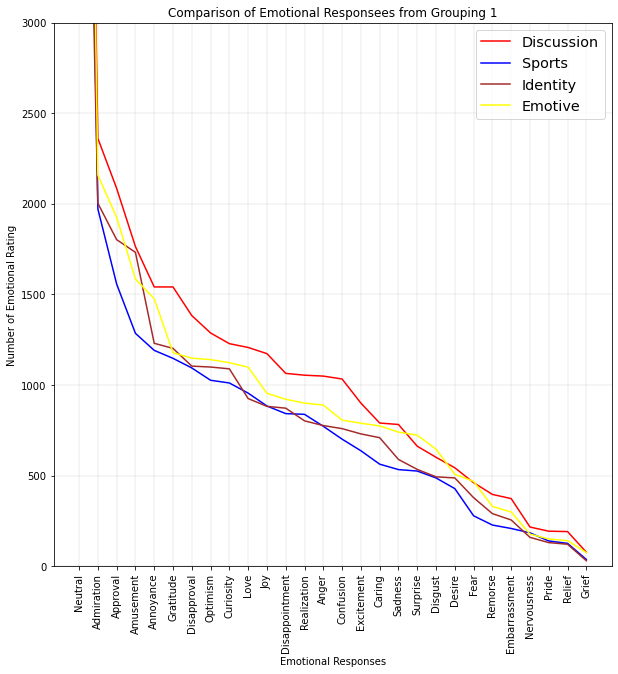

In [135]:
# Grabbing Emotion for the first major group (Discussion, Sports, Emotive, Identity)
# Will attempt to make this into a line chart 
DiscussionECount = DiscussionDF['Emotion'].value_counts() # Y-axis 
SportECount = SportDF['Emotion'].value_counts() 
IdentityECount = IdentityDF['Emotion'].value_counts()
EmotiveECount = EmotiveDF['Emotion'].value_counts()

# Plotting
x_axis = np.arange(len(DiscussionECount)) 
tick_locations = [value for value in x_axis]
figGroupOneE, axGroupOneE = plt.subplots(figsize=(10,10))
axGroupOneE.plot(x_axis, DiscussionECount, label='Discussion', c='red')
axGroupOneE.plot(x_axis, SportECount, label='Sports', c='blue')
axGroupOneE.plot(x_axis, IdentityECount, label='Identity', c='brown')
axGroupOneE.plot(x_axis, EmotiveECount, label='Emotive', c='yellow')
axGroupOneE.grid(b=True, which='major', color='black', linewidth=0.075)
legendGroupOneE = axGroupOneE.legend(loc='best', fontsize='x-large')
plt.ylim(0, 3000)
plt.xlabel('Emotional Responses')
plt.ylabel('Number of Emotional Rating')
plt.title('Comparison of Emotional Responsees from Grouping 1')
plt.xticks(tick_locations, ['Neutral', 'Admiration', 'Approval', 'Amusement', 'Annoyance', 'Gratitude', 'Disapproval',
              'Optimism', 'Curiosity', 'Love', 'Joy', 'Disappointment',
               'Realization', 'Anger','Confusion','Excitement',
               'Caring', 'Sadness', 'Surprise', 'Disgust', 'Desire', 'Fear', 'Remorse',
               'Embarrassment', 'Nervousness', 'Pride', 'Relief', 'Grief'], rotation='vertical')
plt.show()

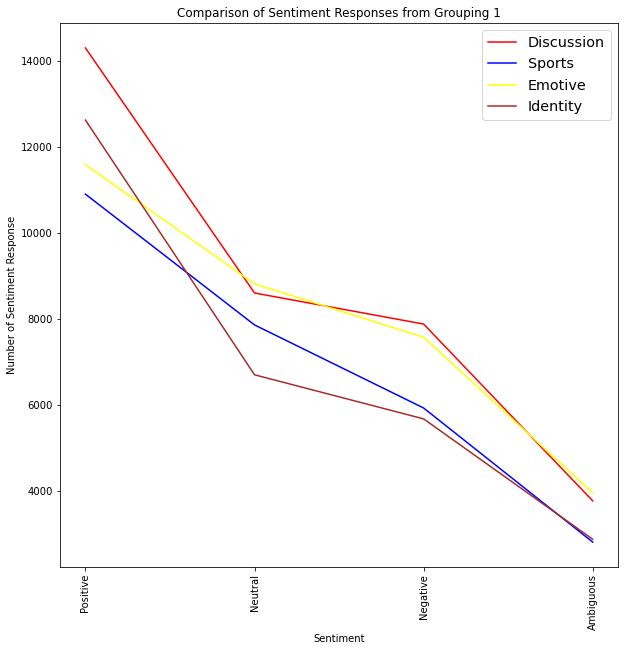

In [136]:
# Grabbing Sentiment for the first major group 
DiscussionSCount = DiscussionDF.Sentiment.value_counts() 
SportSCount = SportDF.Sentiment.value_counts() 
EmotiveSCount = EmotiveDF.Sentiment.value_counts() 
IdentitySCount = IdentityDF.Sentiment.value_counts() 

# Plotting
# Defining x-axis and tick locations
x_axis = np.arange(len(DiscussionSCount)) 
tick_locations = [value for value in x_axis]
# x_axis and tick_location from first chart
figGroupOneS, axGroupOneS = plt.subplots(figsize=(10,10))
axGroupOneS.plot(x_axis, DiscussionSCount, label='Discussion', c='red')
axGroupOneS.plot(x_axis, SportSCount, label='Sports', c='blue')
axGroupOneS.plot(x_axis, EmotiveSCount, label='Emotive', c='yellow')
axGroupOneS.plot(x_axis, IdentitySCount, label='Identity', c='brown')
legendGroupOneS = axGroupOneS.legend(loc='best', fontsize='x-large')
plt.xlabel('Sentiment')
plt.ylabel('Number of Sentiment Response')
plt.title('Comparison of Sentiment Responses from Grouping 1')
plt.xticks(tick_locations, ['Positive', 'Neutral', 'Negative', 'Ambiguous'], rotation='vertical')
plt.show()

### WordCloud

In [137]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

In [138]:
STOPWORDS
stopwords = set(STOPWORDS)
stWord = list(stopwords)
stWord.append('NAME')
stWord.append('S')
stWord.append('t')
stWord.append('one')
stWord.append('really')
stWord.append('Oh')
stWord.append('thing')

In [139]:
SenPosDF = RaterDF.loc[(RaterDF['Sentiment'] == 'Positive'), :]
SenNegDF = RaterDF.loc[(RaterDF['Sentiment'] == 'Negative'), :]
SenNegDF

Text          Subreddit  \
3                                      Those subs ... wtf          minnesota   
4       Wait.....What? You do know that's not how it w...  TrollXChromosomes   
8       Ugh, so misleading, and such a disappointment ...      muacirclejerk   
9       Because he's attractive. Hence [NAME] come out...           Persona5   
10              Damn these refs actually fucking hate us.       chicagobulls   
...                                                   ...                ...   
207248                                  you are pathetic.         pittsburgh   
207249                           Youve missed everything.   Instagramreality   
207250    Yeah I could definitely see that, which is sad.        Blackfellas   
207251                                         Sad... RIP  oldpeoplefacebook   
207252  Nursing school is wrong on that. Still, sickle...            nursing   

             Group                 UTC  Rater ID         Emotion Sentiment  
3         regional 2019-01-10 16:13:51         0           Anger  Negative  
4         identity 2019-01-17 04:47:51         0       Annoyance  Negative  
8         identity 2019-01-17 15:30:43         0  Disappointment  Negative  
9            games 2019-01-12 01:59:08         0         Disgust  Negative  
10          sports 2019-01-16 03:59:21         0         Disgust  Negative  
...            ...                 ...       ...             ...       ...  
207248    regional 2019-01-26 02:18:38        81         Sadness  Negative  
207249     emotive 2019-01-11 05:58:20        81         Sadness  Negative  
207250  discussion 2019-01-15 14:25:40        81         Sadness  Negative  
207251     emotive 2019-01-04 15:12:15        81         Sadness  Negative  
207252    identity 2019-01-07 12:50:31        81         Sadness  Negative  

[45912 rows x 7 columns]

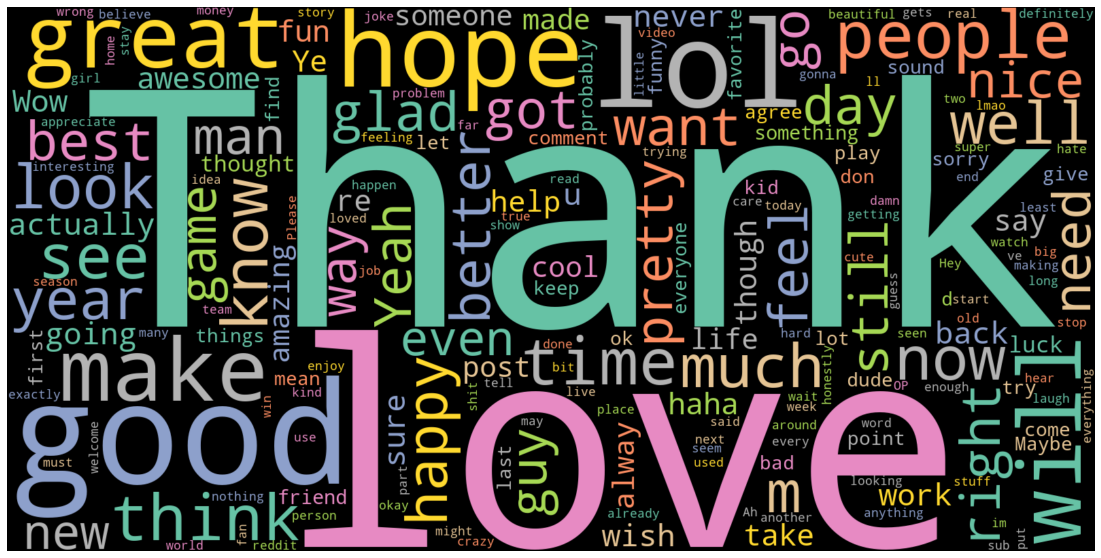

In [141]:
text = " ".join(i for i in SenPosDF.Text)
wordcloud = WordCloud(stopwords=stWord,width=1600, height=800, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('Resources/PositiveSentCloud.png')
plt.show()

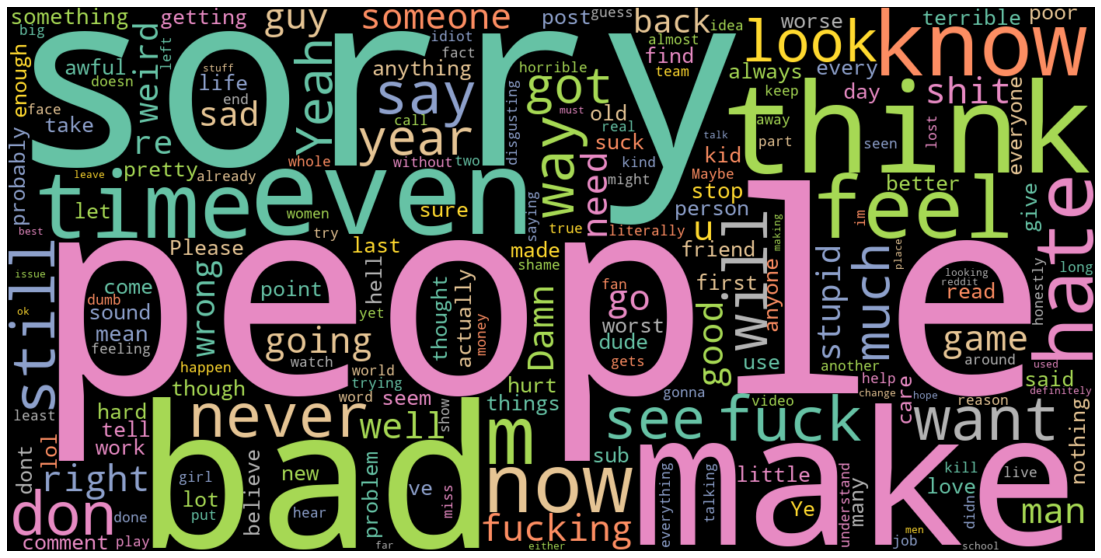

In [142]:
text = " ".join(i for i in SenNegDF.Text)
wordcloud = WordCloud(stopwords=stWord,width=1400, height=700, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('Resources/NegativeSentCloud.png')
plt.show()

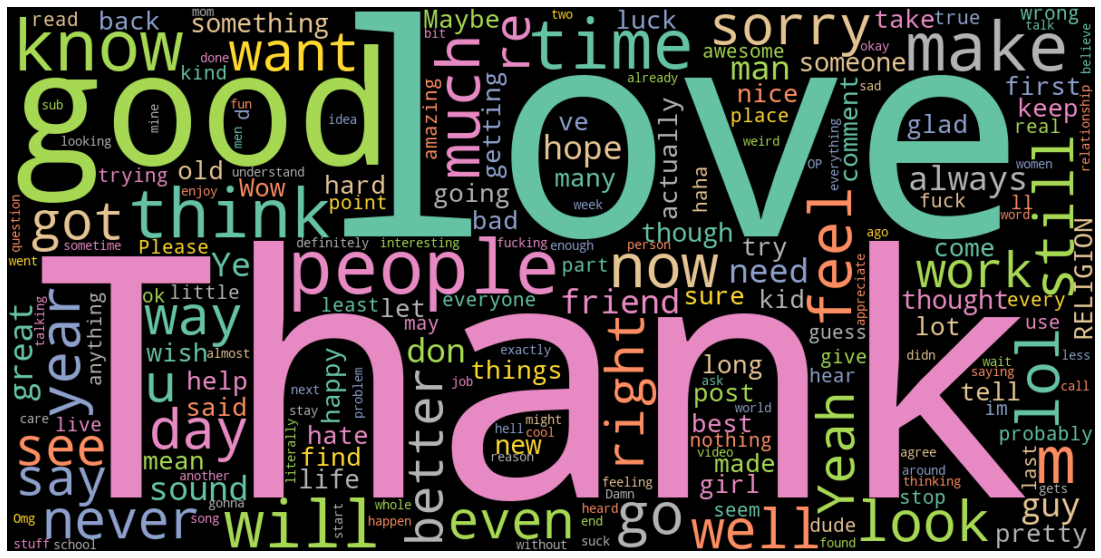

In [ ]:
text = " ".join(i for i in IdentityDF.Text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stWord,width=1200, height=600, random_state=1, background_color='black', colormap='Set2', collocations=False).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('Resources/IdentityCloud.png')
plt.show()

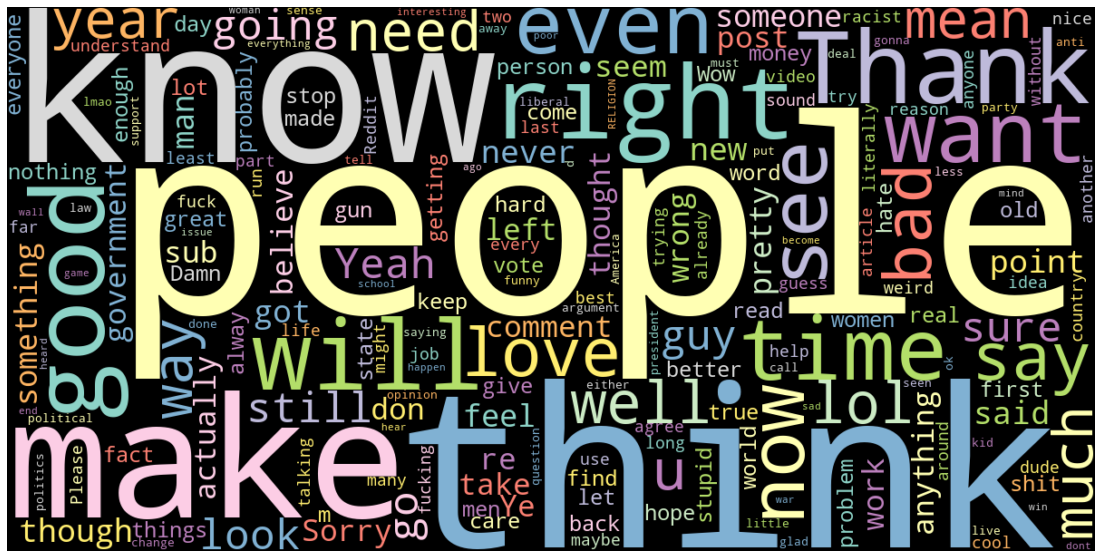

In [143]:
text = " ".join(i for i in PoliticsDF.Text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stWord,width=1200, height=600, random_state=1, background_color='black', colormap='Set3', collocations=False).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('Resources/PoliticsCloud.png')
plt.show()

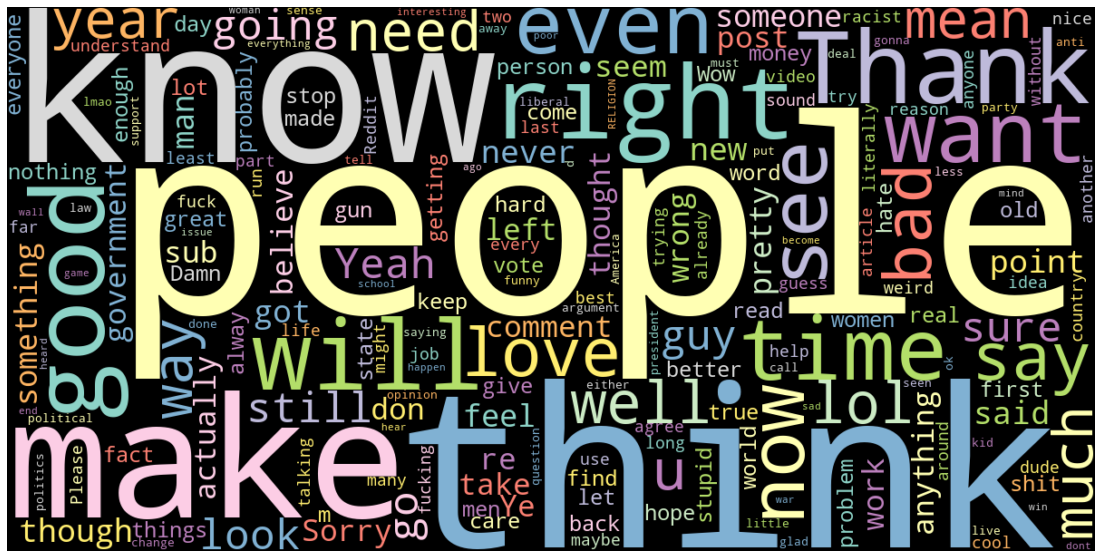

In [144]:
PoliticsNDF = PoliticsDF.loc[(dfCleanCat['Emotion'] == 'Neutral') & (dfCleanCat['Sentiment'] == 'Ambiguous'), :]
text = " ".join(i for i in PoliticsDF.Text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stWord,width=1200, height=600, random_state=1, background_color='black', colormap='Set3', collocations=False).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('Resources/PoliticsNCloud.png')
plt.show()

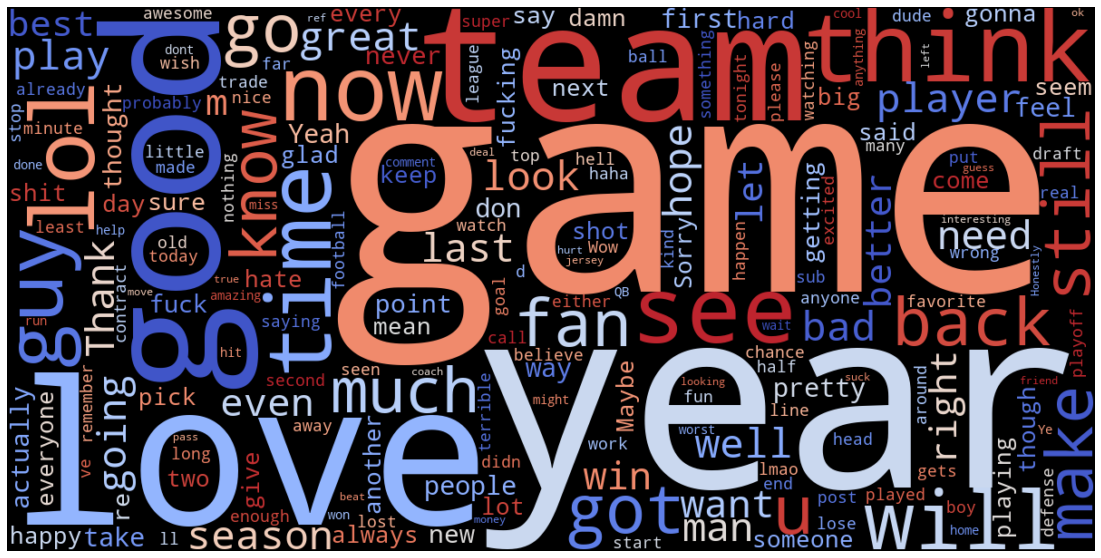

In [145]:
text = " ".join(i for i in SportDF.Text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stWord,width=1200, height=600, random_state=1, background_color='black', colormap='coolwarm', collocations=False).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('Resources/SportsCloud.png')
plt.show()

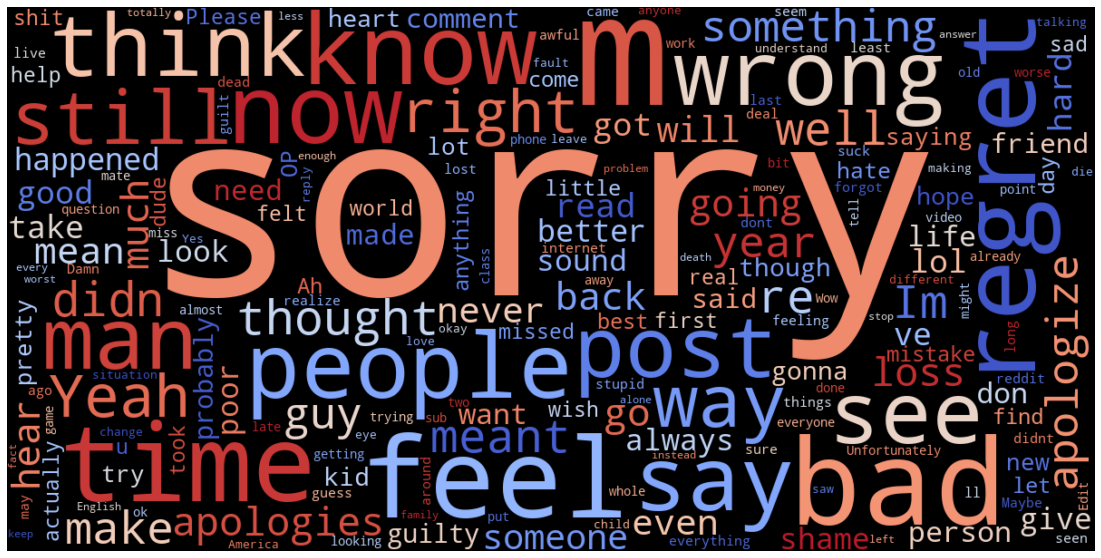

index                                               Text    Subreddit  \
0      24                                    That game hurt.          nrl   
1     145  Sir excuse me my mother says i am a very hands...          nrl   
2     346  In my day I had to wait 20 minutes for the int...          nrl   
3     393  Sorry, I posted this first but then you said s...  confessions   
4     405  I'm sorry for what happened to you. I guess yo...  confessions   
5     569  im so sorry you had to go trougth that. it's a...  confessions   
6     574  im so sorry you had to go trougth that. it's a...  confessions   
7     651  Incels dont get laid regardless of age limits....  confessions   
8     654  im so sorry you had to go trougth that. it's a...  confessions   
9     775  Can you apply to some kind of help within your...  confessions   
10    781                   oml I’m so sorry OP for all that  confessions   
11    801  Every one hates him so your just bragging you ...  confessions   
12    846  Incels dont get laid regardless of age limits....  confessions   
13    905                   oml I’m so sorry OP for all that  confessions   
14    918  Sorry for late reply Rosetta is an actual name...  confessions   

         Group                 UTC  Rater ID  Emotion Sentiment  
0       sports 2019-01-25 01:50:39        72  Remorse  Negative  
1       sports 2019-01-29 07:28:19        21  Remorse  Negative  
2       sports 2019-01-06 22:56:26        35  Remorse  Negative  
3   discussion 2019-01-09 04:58:58        35  Remorse  Negative  
4   discussion 2019-01-30 06:15:44        52  Remorse  Negative  
5   discussion 2019-01-09 09:04:07        52  Remorse  Negative  
6   discussion 2019-01-09 09:04:07        12  Remorse  Negative  
7   discussion 2019-01-24 04:13:00        12  Remorse  Negative  
8   discussion 2019-01-09 09:04:07        70  Remorse  Negative  
9   discussion 2019-01-20 19:00:37        46  Remorse  Negative  
10  discussion 2019-01-07 23:16:58        26  Remorse  Negative  
11  discussion 2019-01-29 22:18:14        37  Remorse  Negative  
12  discussion 2019-01-24 04:13:00        81  Remorse  Negative  
13  discussion 2019-01-07 23:16:58        81  Remorse  Negative  
14  discussion 2019-01-14 01:33:31        15  Remorse  Negative

In [146]:
RemorseDF = dfCleanCat.loc[(dfCleanCat['Emotion'] == 'Remorse'), :]
# !! Be sure to update ['subgroup'] == 'xyz' !! 
RemorseDF.reset_index(inplace=True)

text = " ".join(i for i in RemorseDF.Text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stWord,width=1200, height=600, random_state=1, background_color='black', colormap='coolwarm', collocations=False).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('Resources/RemorseCloud.png')
plt.show()
RemorseDF.head(15)

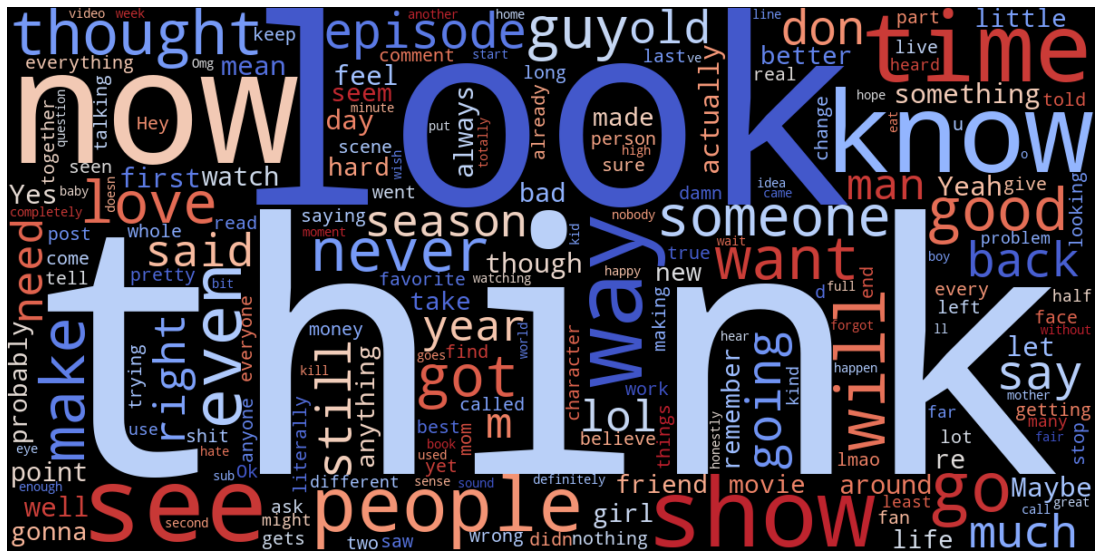

index                                               Text    Subreddit  \
0      24                                    That game hurt.          nrl   
1     145  Sir excuse me my mother says i am a very hands...          nrl   
2     346  In my day I had to wait 20 minutes for the int...          nrl   
3     393  Sorry, I posted this first but then you said s...  confessions   
4     405  I'm sorry for what happened to you. I guess yo...  confessions   
5     569  im so sorry you had to go trougth that. it's a...  confessions   
6     574  im so sorry you had to go trougth that. it's a...  confessions   
7     651  Incels dont get laid regardless of age limits....  confessions   
8     654  im so sorry you had to go trougth that. it's a...  confessions   
9     775  Can you apply to some kind of help within your...  confessions   
10    781                   oml I’m so sorry OP for all that  confessions   
11    801  Every one hates him so your just bragging you ...  confessions   
12    846  Incels dont get laid regardless of age limits....  confessions   
13    905                   oml I’m so sorry OP for all that  confessions   
14    918  Sorry for late reply Rosetta is an actual name...  confessions   

         Group                 UTC  Rater ID  Emotion Sentiment  
0       sports 2019-01-25 01:50:39        72  Remorse  Negative  
1       sports 2019-01-29 07:28:19        21  Remorse  Negative  
2       sports 2019-01-06 22:56:26        35  Remorse  Negative  
3   discussion 2019-01-09 04:58:58        35  Remorse  Negative  
4   discussion 2019-01-30 06:15:44        52  Remorse  Negative  
5   discussion 2019-01-09 09:04:07        52  Remorse  Negative  
6   discussion 2019-01-09 09:04:07        12  Remorse  Negative  
7   discussion 2019-01-24 04:13:00        12  Remorse  Negative  
8   discussion 2019-01-09 09:04:07        70  Remorse  Negative  
9   discussion 2019-01-20 19:00:37        46  Remorse  Negative  
10  discussion 2019-01-07 23:16:58        26  Remorse  Negative  
11  discussion 2019-01-29 22:18:14        37  Remorse  Negative  
12  discussion 2019-01-24 04:13:00        81  Remorse  Negative  
13  discussion 2019-01-07 23:16:58        81  Remorse  Negative  
14  discussion 2019-01-14 01:33:31        15  Remorse  Negative

In [147]:
TVMDF = dfCleanCat.loc[(dfCleanCat['Group'] == 'television movie') & (dfCleanCat['Emotion'] == 'Neutral'), :]
# !! Be sure to update ['subgroup'] == 'xyz' !! 
TVMDF.reset_index(inplace=True)

text = " ".join(i for i in TVMDF.Text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stWord,width=1200, height=600, random_state=1, background_color='black', colormap='coolwarm', collocations=False).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('Resources/TVMCloud.png')
plt.show()
RemorseDF.head(15)

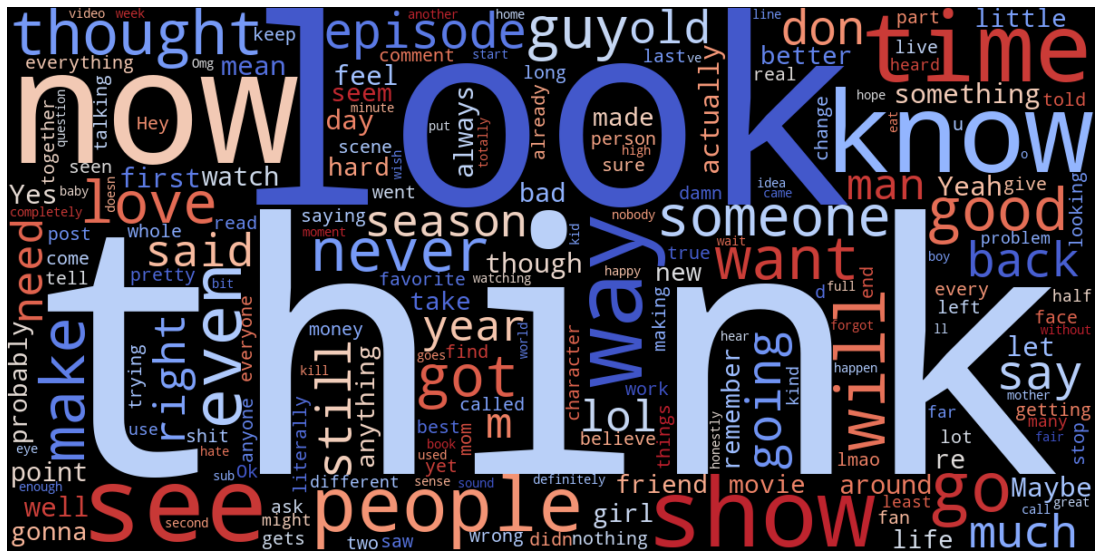

index                                               Text    Subreddit  \
0      24                                    That game hurt.          nrl   
1     145  Sir excuse me my mother says i am a very hands...          nrl   
2     346  In my day I had to wait 20 minutes for the int...          nrl   
3     393  Sorry, I posted this first but then you said s...  confessions   
4     405  I'm sorry for what happened to you. I guess yo...  confessions   
5     569  im so sorry you had to go trougth that. it's a...  confessions   
6     574  im so sorry you had to go trougth that. it's a...  confessions   
7     651  Incels dont get laid regardless of age limits....  confessions   
8     654  im so sorry you had to go trougth that. it's a...  confessions   
9     775  Can you apply to some kind of help within your...  confessions   
10    781                   oml I’m so sorry OP for all that  confessions   
11    801  Every one hates him so your just bragging you ...  confessions   
12    846  Incels dont get laid regardless of age limits....  confessions   
13    905                   oml I’m so sorry OP for all that  confessions   
14    918  Sorry for late reply Rosetta is an actual name...  confessions   

         Group                 UTC  Rater ID  Emotion Sentiment  
0       sports 2019-01-25 01:50:39        72  Remorse  Negative  
1       sports 2019-01-29 07:28:19        21  Remorse  Negative  
2       sports 2019-01-06 22:56:26        35  Remorse  Negative  
3   discussion 2019-01-09 04:58:58        35  Remorse  Negative  
4   discussion 2019-01-30 06:15:44        52  Remorse  Negative  
5   discussion 2019-01-09 09:04:07        52  Remorse  Negative  
6   discussion 2019-01-09 09:04:07        12  Remorse  Negative  
7   discussion 2019-01-24 04:13:00        12  Remorse  Negative  
8   discussion 2019-01-09 09:04:07        70  Remorse  Negative  
9   discussion 2019-01-20 19:00:37        46  Remorse  Negative  
10  discussion 2019-01-07 23:16:58        26  Remorse  Negative  
11  discussion 2019-01-29 22:18:14        37  Remorse  Negative  
12  discussion 2019-01-24 04:13:00        81  Remorse  Negative  
13  discussion 2019-01-07 23:16:58        81  Remorse  Negative  
14  discussion 2019-01-14 01:33:31        15  Remorse  Negative

In [148]:
financeNDF = dfCleanCat.loc[(dfCleanCat['Group'] == 'finance') & (dfCleanCat['Emotion'] == 'Neutral'), :]
# !! Be sure to update ['subgroup'] == 'xyz' !! 
financeNDF.reset_index(inplace=True)

text = " ".join(i for i in TVMDF.Text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stWord,width=1200, height=600, random_state=1, background_color='black', colormap='coolwarm', collocations=False).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('Resources/financeNCloud.png')
plt.show()
RemorseDF.head(15)

In [149]:
# Word searcher
wordFinderDF = dfCleanCat.copy()
wordFinderDF.Text = wordFinderDF.Text.str.lower()

wordSearch = 'trump'
wordSearch.lower()
print(f"Searching for string: {wordSearch}")

wordDF = wordFinderDF.loc[(wordFinderDF['Text'].str.contains(wordSearch)), :]
wordDF.reset_index(inplace=True)
wordDF.drop_duplicates(subset=['Text'], inplace=True)
print(wordDF.Emotion.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
print(wordDF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
wordDF.head(5)

Searching for string: trump
Neutral           30.8%
Approval          10.3%
Realization        7.7%
Annoyance          7.7%
Disapproval        7.7%
Confusion          7.7%
Curiosity          5.1%
Anger              5.1%
Desire             2.6%
Sadness            2.6%
Disappointment     2.6%
Gratitude          2.6%
Optimism           2.6%
Amusement          2.6%
Nervousness        2.6%
Name: Emotion, dtype: object
Neutral      30.8%
Negative     28.2%
Ambiguous    20.5%
Positive     20.5%
Name: Sentiment, dtype: object


f:\Users\18049\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


index                                               Text  \
0     120  isn't your club run by a jabba-the-hut-looking...   
5    1225  the whole world is anti-trump minus a few poor...   
9    6577  i’m not guessing anything. i didn’t make any c...   
11   6614  "i care about the nation and the world" and "i...   
17  11777  to be fair, spinners are supposed to be very s...   

              Subreddit       Group                 UTC  Rater ID  \
0                   nrl      sports 2019-01-28 01:39:16        72   
5              facepalm     emotive 2019-01-10 12:56:46        24   
9   SandersForPresident    politics 2019-01-03 17:07:25        49   
11  SandersForPresident    politics 2019-01-14 13:45:16        36   
17     TopMindsOfReddit  discussion 2019-01-26 14:28:04        49   

        Emotion  Sentiment  
0     Curiosity  Ambiguous  
5      Approval   Positive  
9   Disapproval   Negative  
11      Neutral    Neutral  
17       Desire   Positive

In [150]:
# DataFrame for Default Subreddits

# defaultSubsDF = RaterDF.loc[(RaterDF['subreddit'] == 'videos') | (RaterDF['subreddit'] == 'tifu') | (RaterDF['subreddit'] == 'Jokes') | (RaterDF['subreddit'] == 'UpliftingNews') | (RaterDF['subreddit'] == 'politics') |
#                  (RaterDF['subreddit'] == 'news') | (RaterDF['subreddit'] == 'science') | (RaterDF['subreddit'] == 'GetMotivated') | (RaterDF['subreddit'] == 'funny') | (RaterDF['subreddit'] == 'todayilearned'), :]
# defaultSubsDF.reset_index(inplace=True)
# print(f"Subreddit Averages: ")
# print(defaultSubsDF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# print(f"Dataset Averages: ")
# print(RaterDF.Sentiment.value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
# defaultSubsDF.head(8)

KeyError: 'subreddit'

# Generating a Heatmap of Activity to Time

In [151]:
# Import seaborn to help us with heatmap
# Grab a copy of a cleaned DataFrame as our baseline
import seaborn as sns
alphaDF = RaterDF.copy()
alphaDF

Text          Subreddit  \
0                                     Lol, get em Corsi!         The_Mueller   
1       it’s a sensitive topic and she probably took i...     TooAfraidToAsk   
2               that is how you start the second half wow      denvernuggets   
3                                      Those subs ... wtf          minnesota   
4       Wait.....What? You do know that's not how it w...  TrollXChromosomes   
...                                                   ...                ...   
207320  Holy shit! No way in hell I'd get that close t...             Dallas   
207321  Tiki Lounge always smells like sewage. I'm sur...         pittsburgh   
207322  OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...      DenverBroncos   
207323  In this day and age I’m actually surprised at ...    britishproblems   
207324  hahaha. I was/am honestly surprised that is th...           medicine   

             Group                 UTC  Rater ID    Emotion  Sentiment  
0         politics 2019-01-22 16:00:57         0  Amusement   Positive  
1       discussion 2019-01-02 04:14:04         0  Amusement   Positive  
2           sports 2019-01-04 04:30:14         0  Amusement   Positive  
3         regional 2019-01-10 16:13:51         0      Anger   Negative  
4         identity 2019-01-17 04:47:51         0  Annoyance   Negative  
...            ...                 ...       ...        ...        ...  
207320    regional 2019-01-20 12:57:14        81   Surprise  Ambiguous  
207321    regional 2019-01-02 15:32:02        81   Surprise  Ambiguous  
207322      sports 2019-01-12 08:50:31        81   Surprise  Ambiguous  
207323    regional 2019-01-09 09:03:39        81   Surprise  Ambiguous  
207324    identity 2019-01-30 22:18:02        81   Surprise  Ambiguous  

[207325 rows x 7 columns]

In [155]:
alphaGroup_DF = alphaDF.groupby(pd.Grouper(key='UTC', freq='2h'))['Rater ID'].value_counts()   # Group comments rated by 2 hour windows - the amount of ratings given corresponds to amount of comments made
alGroupDF = pd.DataFrame(alphaGroup_DF)                                                             # Turning it into a DF
alGroupDF                                                                                           # Visualize the DF. It gives us a DF with two indexes (Time & Rater ID) then the value count of each ID

Rater ID
UTC                 Rater ID          
2019-01-01 00:00:00 4               42
                    61              34
                    37              31
                    2               26
                    15              22
...                                ...
2019-01-31 22:00:00 31               1
                    58               1
                    65               1
                    75               1
                    79               1

[24787 rows x 1 columns]

In [156]:
alGroupDF.reset_index(level=1, drop=True, inplace=True)                 # Dropping the ID index
alGroupDF.rename(columns={"Rater ID" : "Comments"}, inplace=True)       # Renaming to 'Comments' to avoid confusion
alGroupDF.reset_index(inplace=True)                                     # Use .reset_index to push a new index; avoids complications from groupby(pd.Grouper(key))
alGroupDF

UTC  Comments
0     2019-01-01 00:00:00        42
1     2019-01-01 00:00:00        34
2     2019-01-01 00:00:00        31
3     2019-01-01 00:00:00        26
4     2019-01-01 00:00:00        22
...                   ...       ...
24782 2019-01-31 22:00:00         1
24783 2019-01-31 22:00:00         1
24784 2019-01-31 22:00:00         1
24785 2019-01-31 22:00:00         1
24786 2019-01-31 22:00:00         1

[24787 rows x 2 columns]

In [157]:
betaDF = alGroupDF.groupby(pd.Grouper(key='UTC', freq='2h')).sum()      # Using pd.Grouper and .sum to merge comments by time window.
betaDF.reset_index(inplace=True)                                                # Use .reset_index to push a new index; avoids complications from .dt.date
betaDF 

UTC  Comments
0   2019-01-01 00:00:00       690
1   2019-01-01 02:00:00       567
2   2019-01-01 04:00:00       474
3   2019-01-01 06:00:00       421
4   2019-01-01 08:00:00       324
..                  ...       ...
367 2019-01-31 14:00:00       634
368 2019-01-31 16:00:00       761
369 2019-01-31 18:00:00       746
370 2019-01-31 20:00:00       881
371 2019-01-31 22:00:00       715

[372 rows x 2 columns]

In [158]:
betaDF['Dates'] = betaDF.UTC.dt.date        # Breaking DT column into column 'Dates'
betaDF['Time'] = betaDF.UTC.dt.time         # Breaking DT column into column 'Time'
betaDF.drop(columns=['UTC'], inplace=True)  # Dropping DT index
betaDF

Comments       Dates      Time
0         690  2019-01-01  00:00:00
1         567  2019-01-01  02:00:00
2         474  2019-01-01  04:00:00
3         421  2019-01-01  06:00:00
4         324  2019-01-01  08:00:00
..        ...         ...       ...
367       634  2019-01-31  14:00:00
368       761  2019-01-31  16:00:00
369       746  2019-01-31  18:00:00
370       881  2019-01-31  20:00:00
371       715  2019-01-31  22:00:00

[372 rows x 3 columns]

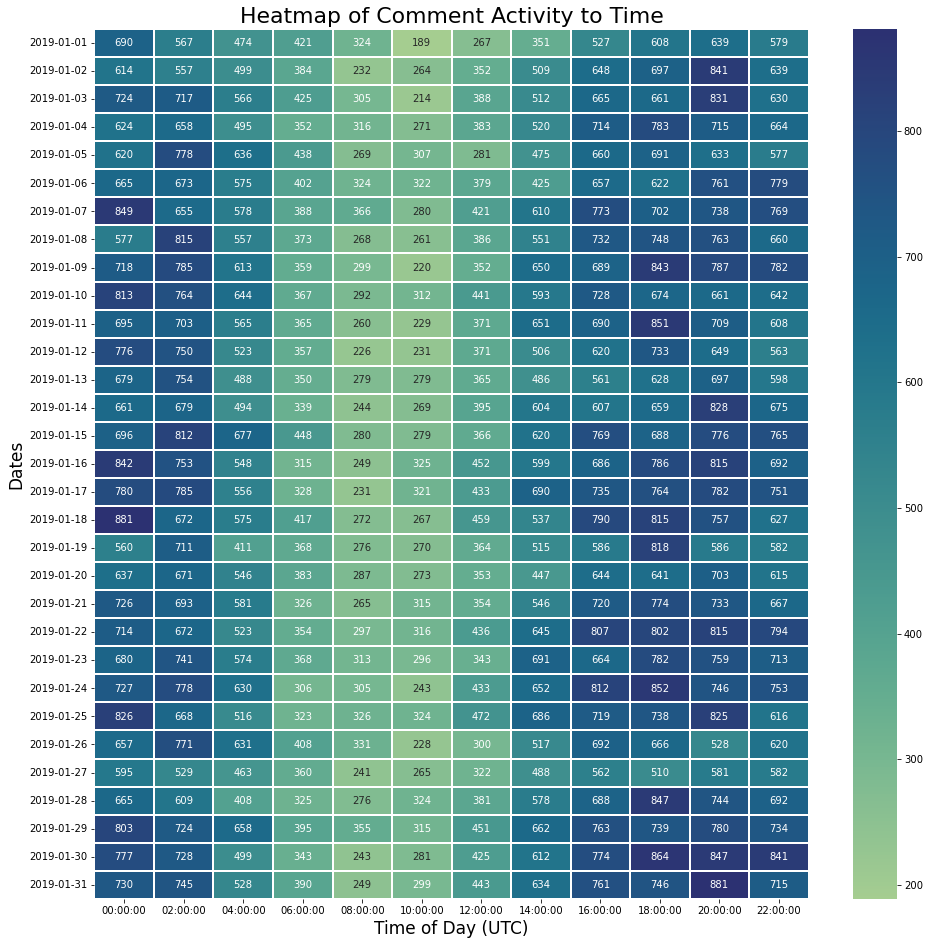

In [162]:
# Preparing a pivot table for Seaborn
betaPivot = betaDF.pivot('Dates', 'Time', 'Comments')

# Plot size, parameters, titles, etc.
plt.figure(figsize=(16, 16))
sns.heatmap(betaPivot, annot=True, fmt="g", cmap='crest', linewidth=1)
plt.title("Heatmap of Comment Activity to Time", fontsize=22)
plt.xlabel('Time of Day (UTC)', fontsize=17)
plt.ylabel('Dates', fontsize=17)
# Save and show
plt.savefig('Resources/HeatmapActivity.png')
plt.show()